### Setup packages 

In [2]:
from pprint import pprint as pp

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%pip install progressbar
%pip install plotnine
%pip install torch
%pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12082 sha256=5eee8b4b9cc946b1d31045e1e81f007aecfa305e32c22f3eacbd89e981f94feb
  Stored in directory: /root/.cache/pip/wheels/f0/fd/1f/3e35ed57e94cd8ced38dd46771f1f0f94f65fec548659ed855
Successfully built progressbar
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
time: 165 µs (started: 2022-08-10 11:12:34 +00:00)


In [5]:
from plotnine import *
from plotnine.themes import *

time: 1.83 s (started: 2022-08-10 11:12:34 +00:00)


In [6]:
import tensorflow as tf
from scipy.io import loadmat
import random
import math
import tensorflow_probability as tfp

time: 2.9 s (started: 2022-08-10 11:12:35 +00:00)


_paper_name_ establishes the reusable name of the paper, it represents the directory under data_papers on the google drive

In [7]:
import os, sys
import errno

# make a directory if it does not exist
def make_dir_if_not_exist(used_path):
    if not os.path.isdir(used_path):
        try:
            os.mkdir(used_path)
        except OSError as exc:
            if exc.errno != errno.EEXIST:
                raise exc
            else:
                raise ValueError(f'{used_path} directoy cannot be created because its parent directory does not exist.')

# make directories if they do not exist

# make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}")


time: 5.54 ms (started: 2022-08-10 11:12:38 +00:00)


In [8]:
# Set up the imports
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

import site
import os
import tensorflow as tf
import pandas as pd
import h5py as h5
import matplotlib.pyplot as plt
import errno
import numpy as np
import itertools
import multiprocessing
import json
import datetime
import random
from collections import defaultdict
from sklearn.model_selection import train_test_split

pd.set_option('display.width', 400)
pd.set_option('display.max_columns', 40)


time: 9.57 ms (started: 2022-08-10 11:12:38 +00:00)


In [9]:
import torch 
import matplotlib.pyplot as plt
import numpy as np
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm
from matplotlib import cm
import pdb


time: 2.43 s (started: 2022-08-10 11:12:38 +00:00)


In [10]:
import plotly.graph_objects as go
import plotly.express as px


time: 2.2 s (started: 2022-08-10 11:12:41 +00:00)


### Shared functions across models

In [11]:
# a set up that just maximizes the loss s.t. loss < eps (maximizeloss_weights_st) using the weights on the losses
from scipy.optimize import LinearConstraint, NonlinearConstraint
from scipy.optimize import Bounds
from functools import partial
from scipy.optimize import minimize
from functools import wraps

def negative(f):
    @wraps(f)
    def g(*args,**kwargs):
        return - f(*args,**kwargs)
    # g.__name__ = f'negative({f.__name__})'
    return g
# kl_loss = nn.KLDivLoss(size_average=None, reduction="batchmean")

# we can add more minimization functions here later (e.g. SS diff)
def KLDiffHere( varX, loss_terms, log_target = False, reduction = "mean"):  
  target = torch.tensor([1./len(loss_terms)]*len(loss_terms))*torch.tensor(loss_terms)
  input = torch.tensor(varX*loss_terms)
  loss_pointwise = target * (torch.log(target) - torch.log(input))
  if reduction == "mean":  # default
      loss = loss_pointwise.mean()
  elif reduction == "batchmean":  # mathematically correct
      loss = loss_pointwise.sum() / input.size(0)
  elif reduction == "sum":
      loss = loss_pointwise.sum()
  else:  # reduction == "none"
      loss = loss_pointwise  
  return loss

  # return torch.nn.KLDivLoss(varX*loss_terms,np.array([1./len(loss_terms)]*len(loss_terms))*loss_terms)

def minimize_weights_st(loss_terms, loss_func):
  bounds = Bounds([0]*len(loss_terms), [1.0]*len(loss_terms))
  linear_constraint = LinearConstraint([[1]*len(loss_terms)], [1.0], [1.0])
  x0 = [0.25]*len(loss_terms)
  res = minimize( partial(loss_func, loss_terms=loss_terms), 
                  x0, 
                  method='trust-constr', 
                  constraints=[linear_constraint],
                  options={'verbose': 0}, 
                  bounds=bounds )
  return res

def maximizeloss_weights_st(loss_terms, loss_func, eps):
  bounds = Bounds([0]*len(loss_terms), [1.0]*len(loss_terms))
  linear_constraint = LinearConstraint([[1]*len(loss_terms)], [1.0], [1.0])
  nonlinear_constraint  = NonlinearConstraint(negative(partial(loss_func, loss_terms=loss_terms)),1E-9,eps)
  # even though zero is the KL minimum it helps to put a negative number here to explore

  x0 = [1.0/len(loss_terms)]*len(loss_terms)
  res = minimize( negative(partial(loss_func, loss_terms=loss_terms)), 
                  x0, 
                  method='trust-constr', 
                  constraints=[linear_constraint, nonlinear_constraint],
                  options={'verbose': 0}, 
                  bounds=bounds )
  return res


time: 50.5 ms (started: 2022-08-10 11:12:43 +00:00)


In [12]:
r1 = maximizeloss_weights_st( [ 34.25, 100.12, 23.45] , KLDiffHere, 1E9)
print(r1.x)

[0.33334757 0.33333761 0.33331482]
time: 237 ms (started: 2022-08-10 11:12:43 +00:00)


In [13]:
import torch
from torch.distributions import Normal

std_norm_cdf = Normal(0, 1).cdf
std_norm_pdf = lambda x: torch.exp(Normal(0, 1).log_prob(x))

def bs_price(right, K, S, T, sigma, r):
    d_1 = (1 / (sigma * torch.sqrt(T))) * (torch.log(S / K) + (r + (torch.square(sigma) / 2)) * T)
    d_2 = d_1 - sigma * torch.sqrt(T)
    
    if right == "C":
        C = std_norm_cdf(d_1) * S - std_norm_cdf(d_2) * K * torch.exp(-r * T)
        return C
        
    elif right == "P":
        P = std_norm_cdf(-d_2) * K * torch.exp(-r * T) - std_norm_cdf(-d_1) * S
        return P

time: 20.1 ms (started: 2022-08-10 11:12:43 +00:00)


In [14]:
import torch

def to_cpu_detach(x):
  if isinstance(x, list):
    return [ y.detach().cpu().item() for y in x ]
  else:
    return x.detach().cpu().item()

time: 2.91 ms (started: 2022-08-10 11:12:43 +00:00)


In [15]:
def huber_loss_zero_target(x, delta = 1.0):
  loss_function = torch.nn.HuberLoss(delta=delta)
  return loss_function(x, torch.zeros_like(x))


time: 1.75 ms (started: 2022-08-10 11:12:43 +00:00)


In [16]:
def save_model_train_intermediate(lr, net,  epoch, eqLossFn, sample_method, trainObj, eqType, eqObject = None ):

  model_id_str =  f"{eqType}_{datetime.datetime.now():%Y%m%d%H%M%S}_{eqLossFn}_{sample_method}_{epoch}_{str(lr).replace('.','p')}_{net.NL}_{net.NN}"
  if eqObject is not None:
    try:
        beta = getattr(eqObject,"beta")
        beta_str = str(beta).replace('.','p')
        model_id_str = model_id_str + f"_beta{beta_str}"
    except AttributeError:
        pass
    try:
        gamma = getattr(eqObject,"gamma")
        gamma_str = str(gamma).replace('.','p')
        model_id_str = model_id_str + f"_gamma{gamma_str}"
    except AttributeError:
        pass
  torch.save(net.state_dict(), f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/intermediate/{model_id_str}")


time: 7.64 ms (started: 2022-08-10 11:12:43 +00:00)


In [17]:
def save_model_train(lr, net,  eqLossFn, sample_method, trainObj, eqType, eqObject = None ):

  model_id_str =  f"{eqType}_{datetime.datetime.now():%Y%m%d%H%M%S}_{eqLossFn}_{sample_method}_{trainObj.stop_epoch}_{str(lr).replace('.','p')}_{net.NL}_{net.NN}"
  
  if eqObject is not None:
    try:
        beta = getattr(eqObject,"beta")
        beta_str = str(beta).replace('.','p')
        model_id_str = model_id_str + f"_beta{beta_str}"
    except AttributeError:
        pass
    try:
        gamma = getattr(eqObject,"gamma")
        gamma_str = str(gamma).replace('.','p')
        model_id_str = model_id_str + f"_gamma{gamma_str}"
    except AttributeError:
        pass
  
  torch.save(net.state_dict(), f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/{model_id_str}")
  df_at_hookintervals = None
  train_losses = None
  validation_losses = None
  try:
      df_at_hookintervals = getattr(trainObj, "history_surfaces_hooks")
      if df_at_hookintervals is not None:
        df_at_hookintervals.to_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/validationHook_{trainObj.hook_interval}_{model_id_str}.csv", index=False)
  except AttributeError:
      print("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "history_surfaces_hooks"))

  try:
      train_losses = getattr(trainObj,"train_losses")
      if train_losses is not None:
        train_losses.tofile(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/trainlosses_{model_id_str}.csv", sep = ',')    
  except AttributeError:
      print("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "train_losses"))
      # raise NotImplementedError("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "train_losses"))

  try:
      validation_losses = getattr(trainObj,"validation_losses")
      if validation_losses is not None:
        validation_losses.tofile(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/validationlosses_{model_id_str}.csv", sep = ',')    
  except AttributeError:
      print("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "validation_losses"))

time: 77 ms (started: 2022-08-10 11:12:43 +00:00)


In [18]:
def save_model_train_stratified_intermediate(lr, net,  epoch, eqLossFn, sample_method, trainObj, eqType, eqObject = None ):

  model_id_str =  f"{eqType}_{datetime.datetime.now():%Y%m%d%H%M%S}_{eqLossFn}_{sample_method}_{epoch}_{str(lr).replace('.','p')}_{net.NL}_{net.NN}"
  if eqObject is not None:
    try:
        beta = getattr(eqObject,"beta")
        beta_str = str(beta).replace('.','p')
        model_id_str = model_id_str + f"_beta{beta_str}"
    except AttributeError:
        pass
    try:
        gamma = getattr(eqObject,"gamma")
        gamma_str = str(gamma).replace('.','p')
        model_id_str = model_id_str + f"_gamma{gamma_str}"
    except AttributeError:
        pass
    try:
        xbreaks = getattr(eqObject,"xbreaks")
        xbreaks_str = str(len(xbreaks))
        model_id_str = model_id_str + f"_StSaXbrks{xbreaks_str}"
    except AttributeError:
        pass
    try:
        tbreaks = getattr(eqObject,"tbreaks")
        tbreaks_str = str(len(tbreaks))
        model_id_str = model_id_str + f"_StSaTbrks{tbreaks_str}"
    except AttributeError:
        pass
  
  torch.save(net.state_dict(), f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/intermediate/{model_id_str}")


time: 18.2 ms (started: 2022-08-10 11:12:44 +00:00)


In [19]:
def save_model_train_stratified(lr, net,  eqLossFn, sample_method, trainObj, eqType, eqObject = None ):

  model_id_str =  f"{eqType}_{datetime.datetime.now():%Y%m%d%H%M%S}_{eqLossFn}_{sample_method}_{trainObj.stop_epoch}_{str(lr).replace('.','p')}_{net.NL}_{net.NN}"
  
  if eqObject is not None:
    try:
        beta = getattr(eqObject,"beta")
        beta_str = str(beta).replace('.','p')
        model_id_str = model_id_str + f"_beta{beta_str}"
    except AttributeError:
        pass
    try:
        gamma = getattr(eqObject,"gamma")
        gamma_str = str(gamma).replace('.','p')
        model_id_str = model_id_str + f"_gamma{gamma_str}"
    except AttributeError:
        pass
    try:
        xbreaks = getattr(eqObject,"xbreaks")
        xbreaks_str = str(len(xbreaks))
        model_id_str = model_id_str + f"_StSaXbrks{xbreaks_str}"
    except AttributeError:
        pass
    try:
        tbreaks = getattr(eqObject,"tbreaks")
        tbreaks_str = str(len(tbreaks))
        model_id_str = model_id_str + f"_StSaTbrks{tbreaks_str}"
    except AttributeError:
        pass
  
  torch.save(net.state_dict(), f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/{model_id_str}")
  df_at_hookintervals = None
  train_losses = None
  validation_losses = None
  try:
      df_at_hookintervals = getattr(trainObj, "history_surfaces_hooks")
      if df_at_hookintervals is not None:
        df_at_hookintervals.to_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/validationHook_{trainObj.hook_interval}_{model_id_str}.csv", index=False)
  except AttributeError:
      print("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "history_surfaces_hooks"))

  try:
      train_losses = getattr(trainObj,"train_losses")
      if train_losses is not None:
        train_losses.tofile(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/trainlosses_{model_id_str}.csv", sep = ',')    
  except AttributeError:
      print("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "train_losses"))
      # raise NotImplementedError("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "train_losses"))

  try:
      validation_losses = getattr(trainObj,"validation_losses")
      if validation_losses is not None:
        validation_losses.tofile(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/validationlosses_{model_id_str}.csv", sep = ',')    
  except AttributeError:
      print("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "validation_losses"))

time: 66 ms (started: 2022-08-10 11:12:44 +00:00)


### Single Stock European Call option - sampling methodology




#### EuropeanOptionNet

In [20]:
class EuropeanOptionNet(nn.Module):
    def __init__(self , NL  , NN, activation = torch.tanh  ):
        super(EuropeanOptionNet, self).__init__()
        self.NL = NL
        self.NN = NN
        ### Number of stocks + time
        ### ( t , xi)
        self.Input = 1 + 1
        self.fc_input = nn.Linear(self.Input,self.NN)
        torch.nn.init.xavier_uniform_(self.fc_input.weight)
        self.linears = nn.ModuleList([nn.Linear(self.NN, self.NN) for i in range(self.NL)])
        for i, l in enumerate(self.linears):    
            torch.nn.init.xavier_uniform_(l.weight)
        self.fc_output = nn.Linear(self.NN,1)
        torch.nn.init.xavier_uniform_(self.fc_output.weight)
        self.act = activation
        
    def forward(self, x):
        # pdb.set_trace()
        h = self.act( self.fc_input(x)  )
        for i, l in enumerate(self.linears):
            h = self.act( l(h) )
        out = self.fc_output(h)
        return out 
    

time: 16.4 ms (started: 2022-08-10 11:26:02 +00:00)


#### EuropeanBlackScholesSingleStock

In [21]:
# bs_price("C", torch.Tensor([ 40.0, 50.0, 60.0]), 50.0, torch.Tensor([ 1.0, 1.0, 1.0]), torch.Tensor([ 0.25, 0.25, 0.25]), 0.05 )

time: 820 µs (started: 2022-08-10 11:26:06 +00:00)


In [22]:
import math

class EuropeanBlackScholesSingleStock():
    
    def __init__(self , net, is_call = True):

        self.C = 0.0           
        self.R = 0.05         # Interest Rate (Yearly)

        self.SIGMA = 0.25  # Volatility (Yearly)
        self.RU = 1.0      # stock correlation
        
        self.K = 50.0              # Strike Price 
        self.T = 1.0               # Maturation time (in YEAR)
        self.MAX_X = self.K*3.0   # MAX price
        ## for accept reject purpose!
        ## free boundry problems
        self.net = net
        
        self.weights = None
        self.eps = 1E9
        self.weights_tbl = []

        self.gamma = 0.0001
        self.beta = 0.0001

        self.is_call = is_call
        self.log_normal_dist = torch.distributions.LogNormal(self.R-self.C, self.SIGMA)
        self.log_normal_dist_5 = torch.distributions.LogNormal(self.R-self.C, self.SIGMA*5.0)

        self.xbreaks = None
        self.tbreaks = None


    def reset_weights(self):
        self.weights = None
        self.eps = 1E9
        self.weights_tbl = []

    def g(self , x):
        # pay off function - 1 is the stock dimension, 0 is the time dimension
        if self.is_call:
          return torch.max( x[:,1].reshape(-1,1) - self.K , torch.zeros([len(x),1]).cuda() ) 
        else:
          return torch.max( self.K - x[:,1].reshape(-1,1) , torch.zeros([len(x),1]).cuda() ) 

    def mu(self, x):
        ## should test it! output dimension is important !
        return (self.R-self.C)*x.reshape(-1,1)

    def sigma(self , x):
        return self.SIGMA*x.reshape(-1,1)

    @staticmethod
    def to_device(x, to_cpu):
      if to_cpu:
        return x.cpu()
      else:
        return x.cuda()

    def sample(self , sample_method_X = "U", size = 2**8, to_cpu = False ):
        '''
        Sampling function
        '''
        # 4 samples returned:
        # internal, boundary, initial, terminal
        if sample_method_X in ["U","UE3"]:
            range_multiplier = 3.0 if sample_method_X == "UE3" else 1.0
            # internal samples
            x = self.to_device(torch.cat(( torch.rand([size,1])*self.T , -self.MAX_X*range_multiplier*torch.rand([size, 1])+self.MAX_X*range_multiplier) , dim = 1 ),to_cpu)
            ### Terminal time samples
            x_terminal = self.to_device(torch.cat( ( torch.zeros(size, 1) + self.T , -self.MAX_X*range_multiplier*torch.rand([size, 1])+self.MAX_X*range_multiplier ) , dim = 1 ),to_cpu)
            ### initial time samples
            # x_initial = torch.cat( ( torch.zeros(size, 1), -self.MAX_X*range_multiplier*torch.rand([size, 1])+self.MAX_X*range_multiplier ) , dim = 1 ).cuda()
            ### initial time samples
            x_initial = self.to_device(torch.cat( ( torch.zeros(size, 1), self.K*torch.ones( size, 1)) , dim = 1 ),to_cpu)
            ### non-zero
            stock_space = self.K*0.8*torch.rand([size, 1]) if self.is_call else self.K*(1.2 + torch.rand([size, 1]))
            x_nonzero = self.to_device(torch.cat( ( torch.rand([size,1])*self.T, stock_space ) , dim = 1 ),to_cpu)
            compare = self.net(x_nonzero) 
            mask = compare < 0
            x_nonzero = x_nonzero[mask.reshape(-1),:]
            # x_initial = torch.cat( ( torch.zeros(size, 1), -self.MAX_X*range_multiplier*torch.rand([size, 1])+self.MAX_X*range_multiplier) , dim = 1 ).cuda()
            return x , x_terminal , x_initial, x_nonzero
    
        if sample_method_X in ["LN", "LN5"]:
            ln_dist = self.log_normal_dist_5 if sample_method_X == "LN5" else self.log_normal_dist
            # internal samples
            x = self.to_device(torch.cat(( torch.rand([size,1])*self.T , torch.maximum(ln_dist.sample((size,)).reshape(-1,1)*self.K,torch.Tensor([0.0]))   ) , dim = 1 ),to_cpu)
            ### Terminal time samples
            x_terminal = self.to_device(torch.cat( ( torch.zeros(size, 1) + self.T , torch.maximum(ln_dist.sample((size,)).reshape(-1,1)*self.K,torch.Tensor([0.0])) ) , dim = 1 ), to_cpu)
            ### initial time samples
            x_initial = self.to_device(torch.cat( ( torch.zeros(size, 1), self.K*torch.ones( size, 1)) , dim = 1 ),to_cpu)
            # x_initial = torch.cat( ( torch.zeros(size, 1),            torch.maximum(ln_dist.sample((size,)).reshape(-1,1)*self.K,torch.Tensor([0.0])) ), dim = 1 ).cuda()
            ### non-zero
            stock_space = self.K*0.8*torch.maximum(ln_dist.sample((size,)).reshape(-1,1),torch.Tensor([0.0]))  if self.is_call else self.K*(1.2 + torch.maximum(ln_dist.sample((size,)).reshape(-1,1),torch.Tensor([0.0])) )
            x_nonzero = self.to_device(torch.cat( ( torch.rand([size,1])*self.T, stock_space ) , dim = 1 ),to_cpu)
            compare = self.net(x_nonzero) 
            mask = compare < 0
            x_nonzero = x_nonzero[mask.reshape(-1),:]
            return (x , x_terminal , x_initial, x_nonzero)

        raise ValueError(f"{sample_method_X} is not a supported sampling method")
        
    def sample_stratified(self , sample_method_X = "U", size = 2**8, to_cpu = False ):

      if self.xbreaks is None and self.tbreaks is None:
        return self.sample(sample_method_X, size, to_cpu)

      # internal_strata_xts = self.to_device(torch.tensor([]),to_cpu)
      # terminal_strata_xts = self.to_device(torch.tensor([]),to_cpu)
      # initial_strata_xts = self.to_device(torch.tensor([]),to_cpu)
      # nonzero_strata_xts = self.to_device(torch.tensor([]),to_cpu)
      internal_strata_xts = []
      terminal_strata_xts = []
      initial_strata_xts = []
      nonzero_strata_xts = []

      # pdb.set_trace()
      
      if sample_method_X in ["U","UE3"]:

          range_multiplier = 3.0 if sample_method_X == "UE3" else 1.0
          xbreaks_used = self.xbreaks[:] if self.xbreaks is not None else [0,range_multiplier*self.MAX_X]
          tbreaks_used = self.tbreaks[:] if self.tbreaks is not None else [0,self.T]
          if xbreaks_used[-1] < range_multiplier*self.MAX_X:
            xbreaks_used.append(range_multiplier*self.MAX_X)
          while xbreaks_used[0] < 0.0:
            xbreaks_used.pop(0)
          if not xbreaks_used:
            xbreaks_used = [0,range_multiplier*self.MAX_X]
          if xbreaks_used[0] > 0.0:            
            xbreaks_used.insert(0, 0.0)

          if tbreaks_used[-1] < self.T:
            tbreaks_used.append(self.T)
          xbreaks_range = xbreaks_used[-1]-xbreaks_used[0]
          tbreaks_range = tbreaks_used[-1]-tbreaks_used[0]
          
          # if len(xbreaks_used)<1:
          #   # pdb.set_trace()
          #   pass

          total_strat_processed = 0
          # internal samples
          for stratum_x_count in range(len(xbreaks_used)-1):
              
            num_samples_in_stratum = 0
            if len(xbreaks_used) > 2:  # x division takes priority so assign it if there is no T division
              range_ratio_x_stratum = (xbreaks_used[stratum_x_count+1]-xbreaks_used[stratum_x_count])/xbreaks_range
              num_samples_in_stratum = math.ceil(range_ratio_x_stratum*size)

            for stratum_t_count in range(len(self.tbreaks)-1):

              if num_samples_in_stratum == 0: # there is only a T division, so use it
                range_ratio_t_stratum = (tbreaks_used[stratum_t_count+1]-tbreaks_used[stratum_t_count])/tbreaks_range
                num_samples_in_stratum = math.ceil(range_ratio_t_stratum*size)
              else:
                # there is both an X and a T division, assign the number of samples uniformly, assuming same scale of X and T
                stratum_coverage_on_unit_square = \
                  ((xbreaks_used[stratum_x_count+1]-xbreaks_used[stratum_x_count])/xbreaks_range)*\
                  ((tbreaks_used[stratum_t_count+1]-tbreaks_used[stratum_t_count])/tbreaks_range)
                num_samples_in_stratum = math.ceil(stratum_coverage_on_unit_square * size)
              # pdb.set_trace()

              ### internal samples
              internal_stratum_t_sample = self.to_device(tbreaks_used[stratum_t_count] + torch.rand([num_samples_in_stratum,1])*(tbreaks_used[stratum_t_count+1]-tbreaks_used[stratum_t_count]), to_cpu)
              internal_stratum_x_sample = self.to_device(xbreaks_used[stratum_x_count] + torch.rand([num_samples_in_stratum,1])*(xbreaks_used[stratum_x_count+1]-xbreaks_used[stratum_x_count]), to_cpu)
              internal_stratum_xt = torch.cat(( internal_stratum_t_sample , internal_stratum_x_sample) , dim = 1 )
              if internal_stratum_xt.numel()<1:
                # pdb.set_trace()
                pass
              
              if not internal_strata_xts: #.numel()<1:
                internal_strata_xts = [ internal_stratum_xt ] # internal_stratum_xt[None,:,:]
              else:
                internal_strata_xts.append(internal_stratum_xt)  # torch.vstack((internal_strata_xts,internal_stratum_xt[None,:,: ]))

              ### Terminal time samples
              terminal_stratum_x_sample = xbreaks_used[stratum_x_count] + torch.rand([num_samples_in_stratum,1])*(xbreaks_used[stratum_x_count+1]-xbreaks_used[stratum_x_count])
              terminal_stratum_xt = self.to_device(torch.cat( ( torch.zeros(num_samples_in_stratum, 1) + self.T , terminal_stratum_x_sample ) , dim = 1 ),to_cpu)

              if not terminal_strata_xts:
                terminal_strata_xts = [ terminal_stratum_xt ] # terminal_stratum_xt[None,:,:]
              else:
                terminal_strata_xts.append(terminal_stratum_xt) # torch.vstack((terminal_strata_xts,terminal_stratum_xt[None,:,: ]))

              ### initial time samples
              # x_initial = torch.cat( ( torch.zeros(size, 1), -self.MAX_X*range_multiplier*torch.rand([size, 1])+self.MAX_X*range_multiplier ) , dim = 1 ).cuda()
              ### initial time samples
              initial_stratum_xt = self.to_device(torch.cat( ( torch.zeros(num_samples_in_stratum, 1), self.K*torch.ones( num_samples_in_stratum, 1)) , dim = 1 ),to_cpu)
              if not initial_strata_xts: #.numel()<1:
                initial_strata_xts = [initial_stratum_xt] # initial_stratum_xt[None,:,:]
              else:
                initial_strata_xts.append(initial_stratum_xt) # torch.vstack((initial_strata_xts,initial_stratum_xt[None,:,: ]))

              ### non-zero value samples
              stratum_mapped_stock_space = None
              if self.is_call:
                stratum_mapped_stock_space = self.K*(1.0/xbreaks_used[-1])* np.array([ xbreaks_used[stratum_x_count], xbreaks_used[stratum_x_count+1]])
              else:
                stratum_mapped_stock_space = self.K + self.K*(1.0/xbreaks_used[-1])*np.array([ xbreaks_used[stratum_x_count], xbreaks_used[stratum_x_count+1]])              
              nonzero_stratum_x_sample = stratum_mapped_stock_space[0] + torch.rand([num_samples_in_stratum, 1])*(stratum_mapped_stock_space[1]-stratum_mapped_stock_space[0])
              nonzero_stratum_xt = self.to_device(torch.cat( ( torch.rand([num_samples_in_stratum,1])*self.T, nonzero_stratum_x_sample ) , dim = 1 ),to_cpu)
              compare = self.net(nonzero_stratum_xt) 
              mask = compare < 0
              nonzero_stratum_xt = nonzero_stratum_xt[mask.reshape(-1),:]
              if not nonzero_strata_xts: #.numel()<1:
                nonzero_strata_xts = [nonzero_stratum_xt] #nonzero_stratum_xt[None,:,:]
              else:
                # pdb.set_trace()
                nonzero_strata_xts.append(nonzero_stratum_xt) # torch.vstack((nonzero_strata_xts,nonzero_stratum_xt[None,:,: ]))

              total_strat_processed += 1 
              # print((len(internal_strata_xts),xbreaks_used[stratum_x_count],tbreaks_used[stratum_t_count]))

              # if len(np.where([x.numel()!=4 for x in internal_strata_xts])[0]) >0:
              #   pdb.set_trace()
              #   pass
              # if len(internal_strata_xts) == 3:
              #   pdb.set_trace() # the problem is the next one
              #   pass

          # pdb.set_trace()
          # x_initial = torch.cat( ( torch.zeros(size, 1), -self.MAX_X*range_multiplier*torch.rand([size, 1])+self.MAX_X*range_multiplier) , dim = 1 ).cuda()
          return internal_strata_xts , terminal_strata_xts , initial_strata_xts, nonzero_strata_xts
    
      raise ValueError(f"{sample_method_X} is not a supported sampling method")


    def criterion(self, x , x_terminal , x_initial, x_nonzero, loss_transforms = [torch.square]):
        '''
        Loss function that helps network find solution to equation
        '''   
        # pdb.set_trace()     
        d = torch.autograd.grad(
            self.net(x), 
            x, 
            grad_outputs=torch.ones_like(self.net(x)) ,
            create_graph=True )
        dt  = d[0][:,0].reshape(-1,1)
        dx1 = d[0][:,1].reshape(-1,1)
        # du/dxdx
        dx1x1 = torch.autograd.grad(dx1, 
                                    x , 
                                    grad_outputs=torch.ones_like(dx1) ,
                                    create_graph = True)[0][:,1].reshape(-1,1)
        if loss_transforms is None:
          loss_transforms = [torch.square]
        intC = None
        terC = None
        iniC = None
        nzC = None

        if len(x) == 0:
          # print('zero batch size for domain!')
          intC = [ torch.tensor(0).cuda().float() for loss_transform in loss_transforms ] 
        else:
          # x is above the free boundary ( so immediate pay-off is positive )
          intC_loss = dt + self.mu(x[:,1])*( dx1 ) + 0.5*( (self.sigma(x[:,1])*self.sigma(x[:,1]))*dx1x1 ) - self.R*self.net(x)
          intC = [ loss_transform(intC_loss) for loss_transform in loss_transforms ] 

        # Terminal Condition - should be equal (both in- and out of the money)
        terC = [ loss_transform( self.g(x_terminal) - self.net(x_terminal) ) for loss_transform in loss_transforms ]

        # pdb.set_trace()
        # Initial Condition - should be equal (both in- and out of the money)
        # Time is time to maturity 
        initial_px_est = self.net(x_initial)
        iniC = [ loss_transform( initial_px_est - bs_price("C" if self.is_call else "P", 
                                                           torch.Tensor([self.K]), 
                                                           torch.Tensor([self.K]), 
                                                           torch.Tensor([self.T]), 
                                                           torch.Tensor([self.SIGMA]), 
                                                           torch.Tensor([self.R])).to(initial_px_est.device)  ) for \
                 loss_transform in loss_transforms ]
        # closed_form_initial_pxs = bs_price("C" if self.is_call else "P", self.K, x_initial[:,1], x_initial[:,0], torch.Tensor([self.SIGMA]).to(initial_px_est.device), self.R ).to(initial_px_est.device)
        # iniC = loss_transform( initial_px_est - closed_form_initial_pxs )

        if len(x_nonzero) == 0:
          nzC = [ torch.tensor(0).cuda().float() for loss_transform in loss_transforms ] 
        else:
          nzC = [ loss_transform(self.net(x_nonzero)) for loss_transform in loss_transforms ]
        return  intC , terC , iniC, nzC

    def calculateLoss(self, batch_x, train = True, loss_transforms = [ torch.square ], keep_batch = False):
        '''
        Helper function that Sample and Calculate loss,
        '''        
        # x , x_terminal , x_initial = self.sample(sample_method_X, size)

        # pdb.set_trace()
        x , x_terminal , x_initial, x_nonzero = batch_x
        x = Variable( x , requires_grad=True)
        Ls = self.criterion( x , x_terminal , x_initial, x_nonzero, loss_transforms = loss_transforms )
        intC , terC , iniC, nzC = Ls

        numActive = np.sum([1 if xb.numel()>0 else 0 for xb in batch_x ])
        # DOm = torch.mean(DO).detach().cpu().float().item()
        # TCm = torch.mean(TC).detach().cpu().float().item()
        # BCm = torch.mean(BC).detach().cpu().float().item()
        return_losses = []
        for lc in range(len(loss_transforms)):
          if not keep_batch:
            loss_equalWeightedByType = (1./numActive*torch.mean(intC[lc]) + 1./numActive*torch.mean(terC[lc]) + 1./numActive*torch.mean(iniC[lc]) + 1./numActive*torch.mean(nzC[lc]))
            return_losses.append( [ loss_equalWeightedByType , 
                                    1./numActive*torch.mean(intC[lc]) , 1./numActive*torch.mean(terC[lc]) , 1./numActive*torch.mean(iniC[lc]), 1./numActive*torch.mean(nzC[lc]) , 
                                    loss_equalWeightedByType ] )            
          else:
            return_losses.append( [intC.numpy(), terC.numpy(), iniC.numpy(), nzC.numpy()] )
        return return_losses

    def calculateLossUsingKLMinMax(self , batch_x , train = True, loss_transforms = [ torch.square ], keep_batch = False):
        '''
        Helper function that Samples and Calculate loss,
        This is adapted in that it changes the weights on the losses
        and the distribution of sampling to maximize the loss provided 
        the KL distance of the loss is within positive constraints
        beta represents the constraints on the weights
        gamma represents the constraints on the sampling distribution
        (each representing an upper bound the KL distribution)
        '''        
        # x , x_terminal , x_initial = self.sample(sample_method_X, size)
        x , x_terminal , x_initial, x_nonzero = batch_x
        x = Variable( x, requires_grad=True)
        Ls = self.criterion( x , x_terminal , x_initial, x_nonzero, loss_transforms = loss_transforms)
        intC , terC , iniC, nzC = Ls

        if self.weights is None:
          self.weights = torch.ones(1,len(Ls)).to(intC[0].device)/len(Ls)
        
        # print([DOt, TCt, BCt, torch.log(DOt + TCt + BCt), 1.0/self.gamma * torch.log(DOt + TCt + BCt)])

        numActive = np.sum([1 if xb.numel()>0 else 0 for xb in batch_x ])

        return_losses = []
        for lc in range(len(loss_transforms)):
          if not keep_batch:
            intCt = self.weights[0,0] * torch.pow((1.0/intC[lc].numel() if intC[lc].numel() > 0 else 0.0) * torch.sum( torch.exp(self.beta * intC[lc])), self.gamma/self.beta) 
            terCt = self.weights[0,1] * torch.pow((1.0/terC[lc].numel() if terC[lc].numel() > 0 else 0.0) * torch.sum( torch.exp(self.beta * terC[lc])), self.gamma/self.beta) 
            iniCt = self.weights[0,2] * torch.pow((1.0/iniC[lc].numel() if iniC[lc].numel() > 0 else 0.0) * torch.sum( torch.exp(self.beta * iniC[lc])), self.gamma/self.beta) 
            nzCt = self.weights[0,3] * torch.pow((1.0/nzC[lc].numel() if nzC[lc].numel() > 0 else 0.0) * torch.sum( torch.exp(self.beta * nzC[lc])), self.gamma/self.beta) 
            loss_equalWeightedByType = (1./numActive*torch.mean(intC[lc]) + 1./numActive*torch.mean(terC[lc]) + 1./numActive*torch.mean(iniC[lc]) + 1./numActive*torch.mean(nzC[lc]))
            transformed_loss = 1.0/self.gamma * torch.log(intCt + terCt + iniCt + nzCt)
            return_losses.append( [ transformed_loss , 
                                    1./numActive*torch.mean(intC[lc]) , 1./numActive*torch.mean(terC[lc]) , 1./numActive*torch.mean(iniC[lc]), 1./numActive*torch.mean(nzC[lc]) , 
                                    loss_equalWeightedByType ] )            
          else:
            return_losses.append( [intC[lc].numpy(), terC[lc].numpy(), iniC[lc].numpy(), nzC[lc].numpy()] )
        return return_losses

        # loss_equalWeightedByType = (1./numActive*torch.mean(intC) + 1./numActive*torch.mean(terC) + 1./numActive*torch.mean(iniC) + 1./numActive*torch.mean(nzC))
        # return   transformed_loss, 1./numActive*torch.mean(intC) , 1./numActive*torch.mean(terC) , 1./numActive*torch.mean(iniC) , loss_equalWeightedByType


    def calculateLossKLMinMaxGamma(self , batch_x , train = True, loss_transforms = [ torch.square ], keep_batch = False):
        '''
        Helper function that Samples and Calculate loss,
        This is adapted in that it changes the weights on the losses
        and the distribution of sampling to maximize the loss provided 
        the KL distance of the loss is within positive constraints
        beta represents the constraints on the weights
        gamma represents the constraints on the sampling distribution
        (each representing an upper bound the KL distribution)
        '''        
        # x , x_terminal , x_initial = self.sample(sample_method_X, size)
        x , x_terminal , x_initial, x_nonzero = batch_x
        x = Variable( x, requires_grad=True)
        Ls = self.criterion( x , x_terminal , x_initial, x_nonzero, loss_transforms = loss_transforms)
        intC , terC , iniC, nzC = Ls

        if self.weights is None:
          self.weights = torch.ones(1,len(Ls)).to(intC[0].device)/len(Ls)
        
        # print([DOt, TCt, BCt, torch.log(DOt + TCt + BCt), 1.0/self.gamma * torch.log(DOt + TCt + BCt)])
        numActive = np.sum([1 if xb.numel()>0 else 0 for xb in batch_x ])

        return_losses = []
        for lc in range(len(loss_transforms)):
          if not keep_batch:
            intCt = self.weights[0,0] * (1.0/intC[lc].numel() if intC[lc].numel() > 0 else 0.0) * torch.sum( torch.exp(self.gamma * intC[lc])) 
            terCt = self.weights[0,1] * (1.0/terC[lc].numel() if terC[lc].numel() > 0 else 0.0) * torch.sum( torch.exp(self.gamma * terC[lc])) 
            iniCt = self.weights[0,2] * (1.0/iniC[lc].numel() if iniC[lc].numel() > 0 else 0.0) * torch.sum( torch.exp(self.gamma * iniC[lc])) 
            nzCt = self.weights[0,3] * (1.0/nzC[lc].numel() if nzC[lc].numel() > 0 else 0.0) * torch.sum( torch.exp(self.gamma * nzC[lc])) 
            loss_equalWeightedByType = (1./numActive*torch.mean(intC[lc]) + 1./numActive*torch.mean(terC[lc]) + 1./numActive*torch.mean(iniC[lc]) + 1./numActive*torch.mean(nzC[lc]))
            transformed_loss = 1.0/self.gamma * torch.log(intCt + terCt + iniCt + nzCt)
            return_losses.append( [ transformed_loss , 
                                    1./numActive*torch.mean(intC[lc]) , 1./numActive*torch.mean(terC[lc]) , 1./numActive*torch.mean(iniC[lc]), 1./numActive*torch.mean(nzC[lc]) , 
                                    loss_equalWeightedByType ] )            
          else:
            return_losses.append( [intC[lc].numpy(), terC[lc].numpy(), iniC[lc].numpy(), nzC[lc].numpy()] )
        return return_losses

    

time: 1.29 s (started: 2022-08-10 11:26:07 +00:00)


In [23]:
# torch.tensor([[123,2414,5151],[2312,31,41],[21,5111,1414]]).numel()

time: 736 µs (started: 2022-08-10 11:26:08 +00:00)


#### TrainEuropeanBlackScholesSingleStock

In [24]:
class TrainEuropeanBlackScholesSingleStock():
    
    def __init__(self , net , equation , BATCH_SIZE , debug = False):
        self.history_mean_hooks = [] 
        self.history_surfaces_hooks = None       
        self.history_tl = []
        self.history_internal = []
        self.history_terminal = []
        self.history_initial = []              
        self.history_nonzero = []
        self.BATCH_SIZE = BATCH_SIZE
        self.net = net
        self.model = equation        
        self.debug = debug  
        self.hook_interval = 20      
        if self.debug == True:
            self.hooks = {}            
            self.get_all_layers(self.net)

        self.optimizer_used = optim.Adam

        self.use_early_stop = False
        self.early_stop_patience = 10
        self.early_stop_delta = 0.0        
        self.best_loss = np.Inf
        self.monitored_loss_type = "Train_L2"
        self.early_stop_counter = 0

        self.stop_epoch = 0

        self.validation_sample = None
        self.validation_losses = None
        self.train_losses = None        

        self.loss_to_beat = None
        self.loss_to_start = None
        self.improvement_from_loss_to_start = 100.0
        

    def train(self , epoch , lr, eqLossFn = 'calculateLoss', sample_method_X = "U", key_loss_func = torch.square, huber_delta = 0.5):
        
        self.validation_losses = np.ones((epoch, 6*3 - 1), dtype='float32') * np.nan
        self.train_losses = np.ones((epoch, 6*2 -1 ), dtype='float32') * np.nan

        optimizer = self.optimizer_used(self.net.parameters(), lr)
        # optimizer = optim.SGD(self.net.parameters(), lr)
        loss_avg = 0.0
        loss_calc_method = None
        try:
            loss_calc_method = getattr(self.model, eqLossFn)
        except AttributeError:
            raise NotImplementedError("Class `{}` does not implement `{}`".format(self.model.__class__.__name__, eqLossFn))
        
        for e in range(epoch):
            optimizer.zero_grad()
            # pdb.set_trace()
            sample_batch = self.model.sample(sample_method_X = sample_method_X, size=self.BATCH_SIZE)

            losses_L2, losses_ABS = loss_calc_method( sample_batch, loss_transforms = [ key_loss_func, torch.abs ], keep_batch = False )
            # pdb.set_trace()
            loss , internal , terminal , initial, nonzero, losses_equalWeightedByType = losses_L2
            loss_abs , internal_abs , terminal_abs , initial_abs, nonzero_abs, losses_equalWeightedByType_abs = losses_ABS
            max_loss_L2 = torch.max(torch.tensor([internal , terminal , initial, nonzero]))

            self.train_losses[e,:] = [ to_cpu_detach(loss) , to_cpu_detach(internal) , to_cpu_detach(terminal) , to_cpu_detach(initial), to_cpu_detach(nonzero), 
                                       to_cpu_detach(loss_abs) , to_cpu_detach(internal_abs) , to_cpu_detach(terminal_abs) , to_cpu_detach(initial_abs), to_cpu_detach(nonzero_abs), to_cpu_detach(losses_equalWeightedByType_abs)]

            if self.debug == True and (self.validation_sample is not None):
              losses_L2_validation, losses_ABS_validation, losses_Huber_valiation = loss_calc_method( self.validation_sample, 
                                                                                                     loss_transforms = [ torch.square, torch.abs, partial(huber_loss_zero_target, delta=huber_delta) ], 
                                                                                                     keep_batch = False )
              validation_loss_list = [*to_cpu_detach(losses_L2_validation),
                                      *to_cpu_detach(losses_ABS_validation),
                                      *to_cpu_detach(losses_Huber_valiation)]
              validation_loss_list = validation_loss_list.pop(5) # the L2 loss is duplicated at index 1
              self.validation_losses[e,:] = validation_loss_list
            
            if self.use_early_stop:
              loss_to_check = losses_equalWeightedByType
              if self.monitored_loss_type == "Train_L2":
                pass
              elif self.monitored_loss_type == "Train_L1":             
                loss_to_check = losses_equalWeightedByType_abs
              elif self.monitored_loss_type == "Train_MAXL2":             
                loss_to_check = max_loss_L2

              if loss_to_check < (self.best_loss-self.early_stop_delta):
                self.best_loss = loss_to_check
                self.early_stop_counter = 0
                # print(f"New Loss to beat for early Stop at epoch {e}, original loss: {losses_equalWeightedByType} with patience {self.early_stop_patience}")
              else:
                self.early_stop_counter += 1
              if self.early_stop_counter>=self.early_stop_patience:
                print(f"Early Stop at epoch {e}, {self.monitored_loss_type}: {loss_to_check} with patience {self.early_stop_patience}")
                break
            
            loss_to_check = float(loss.item())
            loss_avg = loss_avg + loss_to_check
            loss.backward()

            optimizer.step()
            if (e % self.hook_interval == (self.hook_interval-1)) or e == 0:

                loss_avg = loss_avg/self.hook_interval
                if self.loss_to_start is None:
                  self.loss_to_start = loss_to_check
                
                if self.loss_to_beat is None:
                  self.loss_to_beat = loss_to_check 

                print("Epoch {} - lr {} -  key loss: {} - eqWeighted loss: {} - L1 loss {} - Max Loss {}".format(e , lr , loss, losses_equalWeightedByType, loss_abs, max_loss_L2 ))
                # print(f"Stage Setting {loss_to_check},{self.loss_to_beat},{self.loss_to_start/self.improvement_from_loss_to_start}")

                if loss_to_check < self.loss_to_beat:
                  if loss_to_check < self.loss_to_start/self.improvement_from_loss_to_start:
                    print(f"Saving intermediate {loss_to_check},{self.loss_to_beat},{self.loss_to_start/self.improvement_from_loss_to_start}")
                    self.loss_to_beat = loss_to_check
                    #  save the thing                    
                    save_model_train_intermediate(lr, self.net,  e, eqLossFn, sample_method_X, self, "EuCallSs", self.model )

                # loss_avg = 0
                ## report detailed loss ## ## puting inside no grad??? for memory optimization!
                # tl , dl , il , bl, _ = self.model.calculateLoss( 2**6 )  # note that this is the standard loss!!

                self.history_tl.append( loss_avg )
                self.history_internal.append( internal )
                self.history_terminal.append( terminal )
                self.history_initial.append( initial )
                self.history_nonzero.append( nonzero )

                if self.debug == True and (self.validation_sample is not None):
                    mean = []
                    for l in self.hooks:
                        mean.append(torch.mean( self.hooks[l] ).item())
                    self.history_mean_hooks.append( mean )
                    xinternal, xterminal, xinitial, xnonzero = self.validation_sample
                    xinternal_res = self.model.net(xinternal).detach()
                    xterminal_res = self.model.net(xterminal).detach()
                    xinitial_res = self.model.net(xinitial).detach()
                    xnonzero_res = self.model.net(xnonzero).detach()

                    # pdb.set_trace()
                    df_internal = self.create_result_df(e, xinternal, xinternal_res, "INTERNAL")
                    df_terminal = self.create_result_df(e, xterminal, xterminal_res, "TERMINAL")
                    df_initial = self.create_result_df(e, xinitial, xinitial_res, "INITIAL")
                    df_nonzero = self.create_result_df(e, xnonzero, xnonzero_res, "NONZERO")
                    
                    if self.history_surfaces_hooks is None:
                      self.history_surfaces_hooks = pd.concat([df_internal, df_terminal, df_initial, df_nonzero],axis=0)
                    else:
                      self.history_surfaces_hooks = pd.concat([self.history_surfaces_hooks,pd.concat([df_internal, df_terminal, df_initial,df_nonzero],axis=0) ], axis=0)

        self.stop_epoch = e

    def train_stratified(self , epoch , lr, 
                         eqLossFn = 'calculateLoss', 
                         sample_method_X = "U", 
                         key_loss_func = torch.square, 
                         huber_delta = 0.5
                         ):
        
        self.validation_losses = np.ones((epoch, 6*3 - 1), dtype='float32') * np.nan
        self.train_losses = np.ones((epoch, 6*2), dtype='float32') * np.nan

        optimizer = self.optimizer_used(self.net.parameters(), lr)
        # optimizer = optim.SGD(self.net.parameters(), lr)
        loss_avg = 0.0
        loss_calc_method = None
        try:
            loss_calc_method = getattr(self.model, eqLossFn)
        except AttributeError:
            raise NotImplementedError("Class `{}` does not implement `{}`".format(self.model.__class__.__name__, eqLossFn))
        
        for e in range(epoch):
            optimizer.zero_grad()
            internal_xts_bts, terminal_xts_bts, initial_xts_bts, nonzero_xts_bts = self.model.sample_stratified(sample_method_X = sample_method_X, size=self.BATCH_SIZE)
            validation_stratum_losses = None #np.array([])#.reshape(1,self.validation_losses.shape[1])
            training_stratum_losses = None # np.array([])#.reshape(1,self.train_losses.shape[1])  
            training_value_to_optimize = torch.tensor(0.0,requires_grad=True)           
            
            # pdb.set_trace()
            for stratum_count in range(len(internal_xts_bts)):              
              # sample_batch = (internal_xts_bts[stratum_count,:,:], 
              #                 terminal_xts_bts[stratum_count,:,:], 
              #                 initial_xts_bts[stratum_count,:,:], 
              #                 nonzero_xts_bts[stratum_count,:,:])  
              sample_batch = (internal_xts_bts[stratum_count], 
                              terminal_xts_bts[stratum_count], 
                              initial_xts_bts[stratum_count], 
                              nonzero_xts_bts[stratum_count])  

              stratum_losses_L2, stratum_losses_ABS = loss_calc_method( sample_batch, loss_transforms = [ key_loss_func, torch.abs ], keep_batch = False )
              if np.isnan(stratum_losses_L2[0].detach().cpu().item()):
                pdb.set_trace()
                pass
            
              if training_stratum_losses is not None:
                training_stratum_losses = torch.vstack([training_stratum_losses, torch.tensor([*to_cpu_detach(stratum_losses_L2), *to_cpu_detach(stratum_losses_ABS)]) ]) 
              else:
                training_stratum_losses = torch.tensor([*stratum_losses_L2, *stratum_losses_ABS], requires_grad=False) 

              # pdb.set_trace()  
              training_value_to_optimize = training_value_to_optimize + stratum_losses_L2[0]

            # pdb.set_trace()              
            training_loss_for_epoch = torch.sum(training_stratum_losses,0)
            loss = training_value_to_optimize

            loss_optimized , internal , terminal , initial, nonzero, losses_equalWeightedByType, \
            loss_abs , internal_abs , terminal_abs , initial_abs, nonzero_abs, losses_equalWeightedByType_abs = training_loss_for_epoch            
            max_loss_L2 = torch.max(torch.tensor([internal , terminal , initial, nonzero]))

            self.train_losses[e,:] = training_loss_for_epoch.detach().numpy()

            if self.debug == True and (self.validation_sample is not None):
              losses_L2_validation, losses_ABS_validation, losses_Huber_valiation = \
                loss_calc_method( self.validation_sample, 
                                  loss_transforms = [ torch.square, torch.abs, partial(huber_loss_zero_target, delta=huber_delta) ], 
                                  keep_batch = False )
              validation_loss = [*to_cpu_detach(losses_L2_validation),
                                              *to_cpu_detach(losses_ABS_validation),
                                              *to_cpu_detach(losses_Huber_valiation)]
              validation_loss = validation_loss.pop(5) # the L2 loss is duplicated at index 1                
              self.validation_losses[e,:] = validation_loss

            if self.use_early_stop:
              loss_to_check = losses_equalWeightedByType
              if self.monitored_loss_type == "Train_L2":
                pass
              elif self.monitored_loss_type == "Train_L1":             
                loss_to_check = losses_equalWeightedByType_abs
              elif self.monitored_loss_type == "Train_MAXL2":             
                loss_to_check = max_loss_L2
              if loss_to_check < (self.best_loss-self.early_stop_delta):
                self.best_loss = loss_to_check
                self.early_stop_counter = 0
                # print(f"New Loss to beat for early Stop at epoch {e}, original loss: {losses_equalWeightedByType} with patience {self.early_stop_patience}")
              else:
                self.early_stop_counter += 1
              if self.early_stop_counter>=self.early_stop_patience:
                print(f"Early Stop at epoch {e}, {self.monitored_loss_type}: {loss_to_check} with patience {self.early_stop_patience}")
                break

            loss_to_check = float(loss.item())
            loss_avg = loss_avg + loss_to_check
            loss.backward()

            optimizer.step()
            if (e % self.hook_interval == (self.hook_interval-1)) or e == 0:
                loss_avg = loss_avg/self.hook_interval

                if self.loss_to_start is None:
                  self.loss_to_start = loss_to_check
                
                if self.loss_to_beat is None:
                  self.loss_to_beat = loss_to_check 

                print("Epoch {} - lr {} -  key loss: {} - eqWeighted loss: {} - L1 loss {} - Max Loss {}".format(e , lr , loss, losses_equalWeightedByType, loss_abs, max_loss_L2 ))
                # print(f"Stage Setting {loss_to_check},{self.loss_to_beat},{self.loss_to_start/self.improvement_from_loss_to_start}")

                if loss_to_check < self.loss_to_beat:
                  if loss_to_check < self.loss_to_start/self.improvement_from_loss_to_start:
                    self.loss_to_beat = loss_to_check
                    #  save the thing
                    print(f"Saving intermediate {loss_to_check},{self.loss_to_beat},{self.loss_to_start/self.improvement_from_loss_to_start}")
                    save_model_train_stratified_intermediate(lr, self.net,  e, eqLossFn, sample_method_X, self, "EuCallSs", self.model )


                # loss_avg = 0
                ## report detailed loss ## ## puting inside no grad??? for memory optimization!
                # tl , dl , il , bl, _ = self.model.calculateLoss( 2**6 )  # note that this is the standard loss!!
                self.history_tl.append( loss_avg )
                self.history_internal.append( internal )
                self.history_terminal.append( terminal )
                self.history_initial.append( initial )
                self.history_nonzero.append( nonzero )
                if self.debug == True and (self.validation_sample is not None):
                    mean = []
                    for l in self.hooks:
                        mean.append(torch.mean( self.hooks[l] ).item())
                    self.history_mean_hooks.append( mean )
                    xinternal, xterminal, xinitial, xnonzero = self.validation_sample
                    xinternal_res = self.model.net(xinternal).detach()
                    xterminal_res = self.model.net(xterminal).detach()
                    xinitial_res = self.model.net(xinitial).detach()
                    xnonzero_res = self.model.net(xnonzero).detach()

                    # pdb.set_trace()
                    df_internal = self.create_result_df(e, xinternal, xinternal_res, "INTERNAL")
                    df_terminal = self.create_result_df(e, xterminal, xterminal_res, "TERMINAL")
                    df_initial = self.create_result_df(e, xinitial, xinitial_res, "INITIAL")
                    df_nonzero = self.create_result_df(e, xnonzero, xnonzero_res, "NONZERO")
                    
                    if self.history_surfaces_hooks is None:
                      self.history_surfaces_hooks = pd.concat([df_internal, df_terminal, df_initial, df_nonzero],axis=0)
                    else:
                      self.history_surfaces_hooks = pd.concat([self.history_surfaces_hooks,pd.concat([df_internal, df_terminal, df_initial,df_nonzero],axis=0) ], axis=0)

        self.stop_epoch = e


    def hook_fn(self, m, i, o):
              self.hooks[m] = o.detach()
            
    def get_all_layers(self, net):
      for name, layer in net._modules.items():
          if isinstance(layer, nn.ModuleList):
              for n , l in layer.named_children():
                l.register_forward_hook(self.hook_fn)
          else:
              # it's a non sequential. Register a hook
              layer.register_forward_hook(self.hook_fn)
    
    def create_result_df(self, e, xsample, xsample_res, sample_type):
      df_xsample = pd.DataFrame(xsample.cpu().numpy(), columns = ["Time", "S1"])
      df_xsample["Epoch"] = e
      df_xsample["Sample"] = sample_type
      df_xsample["Result"] = xsample_res.cpu().numpy()
      return df_xsample



time: 798 ms (started: 2022-08-10 11:26:08 +00:00)


#### Extract EuropeanBlackScholesSingleStock models and run them

In [25]:
os.listdir("/content/drive/MyDrive/data_papers/dgm_lossfunctional/model_finals/")

['EuCallSs_20220508213150_calculateLoss_U_39999_0p0001_5_100',
 'EuCallSs_20220508223001_calculateLoss_LN_39999_0p0001_5_100',
 'EuCallSs_20220508230212_calculateLossUsingKLMinMax_U_39999_0p0001_5_100',
 'EuCallSs_20220508232650_calculateLossUsingKLMinMax_LN_39999_0p0001_5_100',
 'EuCallSs_Huber0p1_20220509080833_calculateLoss_U_39999_0p0001_5_100',
 'EuCallSs_Huber0p1_20220509083018_calculateLoss_LN_39999_0p0001_5_100',
 'EuCallSs_Huber0p1_20220509085253_calculateLossUsingKLMinMax_U_39999_0p0001_5_100',
 'EuCallSs_Huber0p1_20220509091521_calculateLossUsingKLMinMax_LN_39999_0p0001_5_100',
 'EuCallSs_20220510143114_calculateLossUsingKLMinMax_U_39999_0p0001_5_100_beta1p0000000000000001e-07_gamma0p0001',
 'EuCallSs_20220510145422_calculateLossUsingKLMinMax_U_39999_0p0001_5_100_beta0p0001_gamma0p0001',
 'EuCallSs_20220510151626_calculateLossUsingKLMinMax_U_39999_0p0001_5_100_beta0p0001_gamma1p0000000000000001e-07',
 'EuCallSs_20220510160809_calculateLossKLMinMaxGamma_U_39999_0p0001_5_100_b

time: 819 ms (started: 2022-08-10 11:26:15 +00:00)


In [26]:
seed = 123
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

EuCallModel_SL_U = EuropeanOptionNet(NL = 5, NN = 100)
bsSampler = EuropeanBlackScholesSingleStock(EuCallModel_SL_U) # we just use this for sampling
test_data = bsSampler.sample("U", 2000, to_cpu=True)[0]
bs_price_test = bs_price("C", torch.Tensor([ bsSampler.K  ]), test_data[:,1], test_data[:,0], torch.Tensor([bsSampler.SIGMA]), bsSampler.R )

# print(os.listdir(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals"))
EuCallModel_SL_U.load_state_dict(torch.load(f"/content/drive/MyDrive/data_papers/dgm_lossfunctional/model_finals/EuCallSs_20220508213150_calculateLoss_U_39999_0p0001_5_100"))
mae_bs = torch.mean(torch.abs(EuCallModel_SL_U.forward(test_data).reshape(1,-1).detach() - bs_price_test)).item()
pp(mae_bs)

EuCallModel_SL_U.load_state_dict(torch.load(f"/content/drive/MyDrive/data_papers/dgm_lossfunctional/model_finals/EuCallSs_20220508223001_calculateLoss_LN_39999_0p0001_5_100"))
mae_bs = torch.mean(torch.abs(EuCallModel_SL_U.forward(test_data).reshape(1,-1).detach() - bs_price_test)).item()
pp(mae_bs)

EuCallModel_SL_U.load_state_dict(torch.load(f"/content/drive/MyDrive/data_papers/dgm_lossfunctional/model_finals/EuCallSs_20220510145422_calculateLossUsingKLMinMax_U_39999_0p0001_5_100_beta0p0001_gamma0p0001"))
mae_bs = torch.mean(torch.abs(EuCallModel_SL_U.forward(test_data).reshape(1,-1).detach() - bs_price_test)).item()
pp(mae_bs)

EuCallModel_SL_U.load_state_dict(torch.load(f"/content/drive/MyDrive/data_papers/dgm_lossfunctional/model_finals/EuCallSs_Huber0p1_20220509091521_calculateLossUsingKLMinMax_LN_39999_0p0001_5_100"))
mae_bs = torch.mean(torch.abs(EuCallModel_SL_U.forward(test_data).reshape(1,-1).detach() - bs_price_test)).item()
pp(mae_bs)

EuCallModel_SL_U.load_state_dict(torch.load(f"/content/drive/MyDrive/data_papers/dgm_lossfunctional/model_finals/EuCallSs_PiNN_20220810111049_calculateLoss_U_39999_0p0001_5_100"))
mae_bs = torch.mean(torch.abs(EuCallModel_SL_U.forward(test_data).reshape(1,-1).detach() - bs_price_test)).item()
pp(mae_bs)

1.3892239332199097
4.895481586456299
1.6320843696594238
11.720319747924805
1.5553274154663086
time: 6.5 s (started: 2022-08-10 11:26:50 +00:00)


In [67]:
EuCallModel_SL_U.load_state_dict(torch.load(f"/content/drive/MyDrive/data_papers/dgm_lossfunctional/model_finals/EuCallSs_20220508223001_calculateLoss_LN_39999_0p0001_5_100"))
mae_data = pd.DataFrame( { "Error" : (EuCallModel_SL_U.forward(test_data).reshape(1,-1).detach() - bs_price_test).reshape(-1,).numpy().tolist(), 
                            "t" : test_data[:,0].numpy().tolist(),
                            "S" : test_data[:,1].numpy().tolist(),
                            "R" : bsSampler.R,
                            "SIGMA" : bsSampler.SIGMA,
                            "K" : bsSampler.K,
                            "T" : bsSampler.T                          
                          } )

time: 27 ms (started: 2022-08-09 19:04:19 +00:00)


In [68]:
mae_data.head(4)
# test_data

,Error,t,S,R,SIGMA,K,T
0,-2.154125,0.887434,103.456177,0.05,0.25,50.0,1.0
1,0.071004,0.893520,25.428116,0.05,0.25,50.0,1.0
2,-13.557930,0.731394,131.209869,0.05,0.25,50.0,1.0
3,-28.413155,0.530823,148.554855,0.05,0.25,50.0,1.0


time: 10.5 ms (started: 2022-08-09 19:04:20 +00:00)


In [66]:
# [x for x in dir(bsSampler) if "_" not in x]

['C',
 'K',
 'R',
 'RU',
 'SIGMA',
 'T',
 'beta',
 'calculateLoss',
 'calculateLossKLMinMaxGamma',
 'calculateLossUsingKLMinMax',
 'criterion',
 'eps',
 'g',
 'gamma',
 'mu',
 'net',
 'sample',
 'sigma',
 'tbreaks',
 'weights',
 'xbreaks']

time: 4.82 ms (started: 2022-08-09 19:01:13 +00:00)


#### Eu Call - [  (U/LN) x (StandardLoss/KLMinMax)  ;  (U/LN) x (HuberLoss/KLMinMaxHuber) ]

##### Test comparison on 1/2 saved models

In [ ]:
EuCallModel_SL_U = EuropeanOptionNet(NL = 5, NN = 100)
bsSampler = EuropeanBlackScholesSingleStock(EuCallModel_SL_U) # we just use this for sampling
test_data = bsSampler.sample("U", 2**4, to_cpu=True)[0]
# print(os.listdir(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals"))
EuCallModel_SL_U.load_state_dict(torch.load(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/EuCallSs_20220508213150_calculateLoss_U_39999_0p0001_5_100"))

print(EuCallModel_SL_U.forward(test_data).reshape(1,-1).detach().numpy())
print(bs_price("C", torch.Tensor([ bsSampler.K  ]), test_data[:,1], test_data[:,0], torch.Tensor([bsSampler.SIGMA]), bsSampler.R ))


##### Set up data frames and save to file

In [69]:
def create_surface_result_df(sampled_data, exact_results, fits, sample_type):
  df = pd.DataFrame(sampled_data.cpu().detach().numpy(), columns = ["Time", "S1"])
  df["Sample"] = sample_type
  df["Estimate"] = fits.cpu().detach().numpy()
  df["Exact"] = exact_results.cpu().detach().numpy()
  return df

time: 2.44 ms (started: 2022-08-09 19:11:04 +00:00)


In [70]:
paper_name = "dgm_lossfunctional"

time: 680 µs (started: 2022-08-09 19:11:29 +00:00)


In [71]:
from pprint import pprint as pp
pp(os.listdir(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals"))

['EuCallSs_20220508213150_calculateLoss_U_39999_0p0001_5_100',
 'EuCallSs_20220508223001_calculateLoss_LN_39999_0p0001_5_100',
 'EuCallSs_20220508230212_calculateLossUsingKLMinMax_U_39999_0p0001_5_100',
 'EuCallSs_20220508232650_calculateLossUsingKLMinMax_LN_39999_0p0001_5_100',
 'EuCallSs_Huber0p1_20220509080833_calculateLoss_U_39999_0p0001_5_100',
 'EuCallSs_Huber0p1_20220509083018_calculateLoss_LN_39999_0p0001_5_100',
 'EuCallSs_Huber0p1_20220509085253_calculateLossUsingKLMinMax_U_39999_0p0001_5_100',
 'EuCallSs_Huber0p1_20220509091521_calculateLossUsingKLMinMax_LN_39999_0p0001_5_100',
 'EuCallSs_20220510143114_calculateLossUsingKLMinMax_U_39999_0p0001_5_100_beta1p0000000000000001e-07_gamma0p0001',
 'EuCallSs_20220510145422_calculateLossUsingKLMinMax_U_39999_0p0001_5_100_beta0p0001_gamma0p0001',
 'EuCallSs_20220510151626_calculateLossUsingKLMinMax_U_39999_0p0001_5_100_beta0p0001_gamma1p0000000000000001e-07',
 'EuCallSs_20220510160809_calculateLossKLMinMaxGamma_U_39999_0p0001_5_100_b

In [72]:
def get_df_fits(dir_name, title, sampled_internal_data, exact_results, model = None):
  if model is None:
    model = EuropeanOptionNet(NL = 5, NN = 100)
  model.load_state_dict(torch.load(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/{dir_name}"))
  model_fits = model.forward(sampled_internal_data)
  df_model = create_surface_result_df(sampled_internal_data, exact_results, model_fits, title)
  df_model = df_model.sort_values(by=['Time','S1'], ascending=[True, True]).reset_index()
  df_model.drop(['index'], axis=1, inplace=True)
  df_model["diff"] = df_model.Estimate - df_model.Exact
  df_model['diff_abs'] = np.abs(df_model["diff"].tolist())
  df_model['perc_abs'] = np.abs(1.0 - df_model.Estimate/df_model.Exact)
  return df_model

time: 6.07 ms (started: 2022-08-09 19:11:35 +00:00)


In [73]:
EuCallModel_SL_U = EuropeanOptionNet(NL = 5, NN = 100)
bsSampler = EuropeanBlackScholesSingleStock(EuCallModel_SL_U) # we just use this for sampling
sampled_internal_data = bsSampler.sample("U", 2**14, to_cpu=True)[0]
exact_results = bs_price("C", torch.Tensor([ bsSampler.K  ]), sampled_internal_data[:,1], sampled_internal_data[:,0], torch.Tensor([bsSampler.SIGMA]), bsSampler.R )

df_EuCallModel_SL_U = get_df_fits("EuCallSs_20220508213150_calculateLoss_U_39999_0p0001_5_100", "SL_U_NST", sampled_internal_data, exact_results, model=EuropeanOptionNet(NL = 5, NN = 100))
df_EuCallModel_SL_LN = get_df_fits("EuCallSs_20220508223001_calculateLoss_LN_39999_0p0001_5_100", "SL_LN_NST", sampled_internal_data, exact_results, model=EuropeanOptionNet(NL = 5, NN = 100))
df_EuCallModel_KL_U = get_df_fits("EuCallSs_20220508230212_calculateLossUsingKLMinMax_U_39999_0p0001_5_100", "KL_U_NST", sampled_internal_data, exact_results, model=EuropeanOptionNet(NL = 5, NN = 100))
df_EuCallModel_KL_LN = get_df_fits("EuCallSs_20220508232650_calculateLossUsingKLMinMax_LN_39999_0p0001_5_100", "KL_LN_NST", sampled_internal_data, exact_results, model=EuropeanOptionNet(NL = 5, NN = 100))

df_EuCallModel_HL_U = get_df_fits("EuCallSs_Huber0p1_20220509080833_calculateLoss_U_39999_0p0001_5_100", "HL_U_NST", sampled_internal_data, exact_results, model=EuropeanOptionNet(NL = 5, NN = 100))
df_EuCallModel_HL_LN = get_df_fits("EuCallSs_Huber0p1_20220509083018_calculateLoss_LN_39999_0p0001_5_100", "HL_LN_NST", sampled_internal_data, exact_results, model=EuropeanOptionNet(NL = 5, NN = 100))
df_EuCallModel_KLH_U = get_df_fits("EuCallSs_Huber0p1_20220509085253_calculateLossUsingKLMinMax_U_39999_0p0001_5_100", "KLH_U_NST", sampled_internal_data, exact_results, model=EuropeanOptionNet(NL = 5, NN = 100))
df_EuCallModel_KLH_LN = get_df_fits("EuCallSs_Huber0p1_20220509091521_calculateLossUsingKLMinMax_LN_39999_0p0001_5_100", "KLH_LN_NST", sampled_internal_data, exact_results, model=EuropeanOptionNet(NL = 5, NN = 100))

df_EuCallModel_SL_U_ST = get_df_fits("EuCallSs_20220513164145_calculateLoss_U_39999_0p0001_5_100_gamma0p0001_stSaXbrks5_StSaTbrks5", "SL_U_ST", sampled_internal_data, exact_results, model=EuropeanOptionNet(NL = 5, NN = 100))
df_EuCallModel_KL_U_ST = get_df_fits("EuCallSs_20220513204142_calculateLossUsingKLMinMax_U_39999_0p0001_5_100_beta1p0000000000000001e-07_gamma0p0001_StSaXbrks5_StSaTbrks5", "KL_U_ST", sampled_internal_data, exact_results, model=EuropeanOptionNet(NL = 5, NN = 100))
df_EuCallModel_KL_U_ST2 = get_df_fits("EuCallSs_20220514042446_calculateLossUsingKLMinMax_U_39999_0p0001_5_100_beta0p0001_gamma1p0000000000000001e-07_StSaXbrks5_StSaTbrks5", "KL_U_ST2", sampled_internal_data, exact_results, model=EuropeanOptionNet(NL = 5, NN = 100))

df_EuCallModel_SLH_U_ST = get_df_fits("EuCallSs_Huber0p1_20220514210611_calculateLoss_U_39999_0p0001_5_100_beta0p0001_gamma0p0001_StSaXbrks5_StSaTbrks5", "SLH_U_ST", sampled_internal_data, exact_results, model=EuropeanOptionNet(NL = 5, NN = 100))
df_EuCallModel_KLH_U_ST = get_df_fits("EuCallSs_Huber0p1_20220515005345_calculateLossUsingKLMinMax_U_39999_0p0001_5_100_beta1p0000000000000001e-07_gamma0p0001_StSaXbrks5_StSaTbrks5", "KLH_U_ST", sampled_internal_data, exact_results, model=EuropeanOptionNet(NL = 5, NN = 100))


# 'EuCallSs_20220508213150_calculateLoss_U_39999_0p0001_5_100',
#  'EuCallSs_20220508223001_calculateLoss_LN_39999_0p0001_5_100',
#  'EuCallSs_20220508230212_calculateLossUsingKLMinMax_U_39999_0p0001_5_100',
#  'EuCallSs_20220508232650_calculateLossUsingKLMinMax_LN_39999_0p0001_5_100',
#  'EuCallSs_Huber0p1_20220509080833_calculateLoss_U_39999_0p0001_5_100',
#  'EuCallSs_Huber0p1_20220509083018_calculateLoss_LN_39999_0p0001_5_100',
#  'EuCallSs_Huber0p1_20220509085253_calculateLossUsingKLMinMax_U_39999_0p0001_5_100',
#  'EuCallSs_Huber0p1_20220509091521_calculateLossUsingKLMinMax_LN_39999_0p0001_5_100',
#  'EuCallSs_20220510143114_calculateLossUsingKLMinMax_U_39999_0p0001_5_100_beta1p0000000000000001e-07_gamma0p0001',
#  'EuCallSs_20220510145422_calculateLossUsingKLMinMax_U_39999_0p0001_5_100_beta0p0001_gamma0p0001',
#  'EuCallSs_20220510151626_calculateLossUsingKLMinMax_U_39999_0p0001_5_100_beta0p0001_gamma1p0000000000000001e-07',
#  'EuCallSs_20220510160809_calculateLossKLMinMaxGamma_U_39999_0p0001_5_100_beta0p0001_gamma0p0001',
#  'EuCallSs_20220510163042_calculateLossKLMinMaxGamma_U_39999_0p0001_5_100_beta0p0001_gamma1p0000000000000001e-07',
#  'EuCallSs_20220510165222_calculateLossKLMinMaxGamma_U_39999_0p0001_5_100_beta0p0001_gamma0p1',
#  'EuCallSs_20220510180749_calculateLossKLMinMaxGamma_U_39999_0p0001_5_100_beta0p0001_gamma0p001',
#  'EuCallSs_20220513204142_calculateLossUsingKLMinMax_U_39999_0p0001_5_100_beta1p0000000000000001e-07_gamma0p0001_StSaXbrks5_StSaTbrks5',
#  'EuCallSs_20220514003309_calculateLossUsingKLMinMax_U_39999_0p0001_5_100_beta0p0001_gamma0p0001_StSaXbrks5_StSaTbrks5',
#  'EuCallSs_20220514042446_calculateLossUsingKLMinMax_U_39999_0p0001_5_100_beta0p0001_gamma1p0000000000000001e-07_StSaXbrks5_StSaTbrks5',
#  'EuCallSs_20220514073022_calculateLossKLMinMaxGamma_U_39999_0p0001_5_100_beta0p0001_gamma0p0001_StSaXbrks5_StSaTbrks5',
#  'EuCallSs_20220514104452_calculateLossKLMinMaxGamma_U_39999_0p0001_5_100_beta0p0001_gamma1p0000000000000001e-07_StSaXbrks5_StSaTbrks5',
#  'EuCallSs_20220513164145_calculateLoss_U_39999_0p0001_5_100_gamma0p0001_stSaXbrks5_StSaTbrks5',
#  'EuCallSs_20220514172657_calculateLossKLMinMaxGamma_U_39999_0p0001_5_100_beta0p0001_gamma0p001_StSaXbrks5_StSaTbrks5',
#  'EuCallSs_Huber0p1_20220514210611_calculateLoss_U_39999_0p0001_5_100_beta0p0001_gamma0p0001_StSaXbrks5_StSaTbrks5',
#  'EuCallSs_Huber0p1_20220515005345_calculateLossUsingKLMinMax_U_39999_0p0001_5_100_beta1p0000000000000001e-07_gamma0p0001_StSaXbrks5_StSaTbrks5',
#  'EuCallSs_Huber0p1_20220515042748_calculateLossKLMinMaxGamma_U_39999_0p0001_5_100_beta1p0000000000000001e-07_gamma0p0001_StSaXbrks5_StSaTbrks5',
#  'AmCallSs_20220524114755_calculateLoss_U_5388_0p01_3_30'


time: 3.31 s (started: 2022-08-09 19:11:47 +00:00)


In [ ]:
# print(df_EuCallModel_SL_U[df_EuCallModel_SL_U.Exact>0.1].sort_values(by='perc_abs', ascending=False).head(10))
# print(df_EuCallModel_KL_U[df_EuCallModel_KL_U.Exact>0.1].sort_values(by='perc_abs', ascending=False).head(10))
# print(df_EuCallModel_SL_LN[df_EuCallModel_SL_LN.Exact>0.1].sort_values(by='perc_abs', ascending=False).head(10))
print(df_EuCallModel_KL_LN[df_EuCallModel_KL_LN.Exact>0.1].sort_values(by='perc_abs', ascending=False).head(10))

In [75]:
pp(df_EuCallModel_SL_U.head(4))
df_EuCallModel_SL_U.shape

       Time          S1    Sample   Estimate      Exact      diff  diff_abs  perc_abs
0  0.000088   29.862587  SL_U_NST   0.156650   0.000000  0.156650  0.156650       inf
1  0.000113  137.734177  SL_U_NST  82.658432  87.734459 -5.076027  5.076027  0.057857
2  0.000170  131.268539  SL_U_NST  78.300072  81.268967 -2.968895  2.968895  0.036532
3  0.000208   89.999611  SL_U_NST  42.338440  40.000130  2.338310  2.338310  0.058458


(16384, 8)

time: 8.95 ms (started: 2022-08-09 19:12:21 +00:00)


In [76]:
surface_df = pd.concat([df_EuCallModel_SL_U, 
                        df_EuCallModel_SL_LN, 
                        df_EuCallModel_KL_U, 
                        df_EuCallModel_KL_LN, 
                        df_EuCallModel_HL_U, 
                        df_EuCallModel_HL_LN, 
                        df_EuCallModel_KLH_U, 
                        df_EuCallModel_KLH_LN,
                        df_EuCallModel_SL_U_ST,
                        df_EuCallModel_KL_U_ST,
                        df_EuCallModel_SLH_U_ST,
                        df_EuCallModel_KLH_U_ST], axis=0)


time: 13.8 ms (started: 2022-08-09 19:12:53 +00:00)


In [77]:
surface_df.to_csv(f"{paper_name}_EuCallss.csv", index=False)

time: 1.46 s (started: 2022-08-09 19:12:57 +00:00)


##### R implementation

In [ ]:
# require(ggplot2)
# require(ggthemes)
# require(data.table)
# require(dplyr)
# require(interp)
# require(gridExtra)
# require(ggpubr)


# setwd("D:/Code/dgm_lossfunc")

# eucall_data = fread("dgm_lossfunctional_EuCallss.csv")


# get_diff_abs_display <- function(data, interval=1.0) {
  
#   #establish the min and max of scale 
#   grandmin <- 0.0
#   grandmax <- ceiling(max(data$diff_abs))
#   #define the number of breaks.  In this case 8 +1 
#   mybreaks <- seq(grandmin, grandmax, length.out = grandmax/interval)
#   #Function to return the desired number of colors
  
#   mycolors<- function(x) {
#     colors<-colorRampPalette(c("darkblue","dodgerblue","green","yellow","orange","darkred" ))( grandmax/interval )
#     colors[1:x]
#   }
  
#   #Function to create labels for legend
#   breaklabel <- function(x, breaks = mybreaks){
#     labels<- paste0(sapply( breaks[1:(length(breaks)-1)], function(x) {  as.character(round(x,1))   }), "-", 
#                     sapply( breaks[2:length(breaks)], function(x) {  as.character(round(x,1))   }) )
#     labels[1:x]
#   }
  
#   return(list(grandmin, grandmax, mybreaks, mycolors, breaklabel))
# }

# diff_abs_list = get_diff_abs_display(eucall_data)
# diff_abs_breaks = diff_abs_list[[3]]
# diff_abs_colorf = diff_abs_list[[4]]
# diff_abs_lblsf = diff_abs_list[[5]]

# # ggplot(sample_n(eucall_data[(Exact>0.0) & (Sample=="SL_U")],1000), aes(x=Time, y=S1, z=perc_abs)) + geom_contour()
# # ggplot(data, aes(x, y, z = z1)) +
# #   geom_contour_filled(breaks= mybreaks, show.legend = TRUE) +
# #   scale_fill_manual(palette=mycolors, values=breaklabel(8), name="Value", drop=FALSE) +
# #   theme(legend.position = "right")

# contour_log10_perc_abs <- function(d1, title_str, palette = "Spectral") {
#   d1$perc_abs = log10(d1$perc_abs)
#   grid <- with(d1, interp::interp(Time, S1, perc_abs))
#   griddf <- subset(data.frame(Time = rep(grid$x, nrow(grid$z)),
#                               S1 = rep(grid$y, each = ncol(grid$z)),
#                               perc_abs = as.numeric(grid$z)),
#                    !is.na(perc_abs))
#   p<- ggplot(griddf, aes(Time, S1, z = perc_abs)) +
#     geom_contour_filled(colour = "white", show.legend = T) + 
#     scale_fill_brewer(palette = palette, direction = -1) + 
#     theme_fivethirtyeight() + ggtitle(title_str)
  
#   return(p)
# }

# # d1 = eucall_data[(Exact>0.0) & (Sample=="SL_U")]
# # title_str = "European Call, ABS difference - Adam on L2 Loss, Uniform Sampling"
# # palette=diff_abs_colorf(length(diff_abs_breaks))
# # breaks=diff_abs_breaks
# # breaklabels =  diff_abs_lblsf(length(diff_abs_breaks)-1)

# get_legend<-function(myggplot){
#   tmp <- ggplot_gtable(ggplot_build(myggplot))
#   leg <- which(sapply(tmp$grobs, function(x) x$name) == "guide-box")
#   legend <- tmp$grobs[[leg]]
#   return(legend)
# }

# contour_diff_abs <- function(d1, title_str, breaks, palette, breaklabels, show.legend = FALSE) {
  
#   grid <- with(d1, interp::interp(Time, S1, diff_abs))
#   griddf <- subset(data.frame(Time = rep(grid$x, nrow(grid$z)),
#                               S1 = rep(grid$y, each = ncol(grid$z)),
#                               diff_abs = as.numeric(grid$z)),
#                    !is.na(diff_abs))
  
#   p<- ggplot(griddf, aes(Time, S1, z = diff_abs)) +
#     geom_contour_filled(colour = "white", breaks=breaks, show.legend = show.legend) + 
#     scale_fill_manual(palette=palette, values=breaklabels, name="diff_abs", drop=FALSE) + 
#     # scale_fill_brewer(palette = palette, direction = -1) + 
#     theme_fivethirtyeight() + ggtitle(title_str)
#   return(p)
# }

  
# SL_U_Acc_perc_abs = contour_log10_perc_abs(eucall_data[(Exact>0.0) & (Sample=="SL_U")], "European Call, log(10) percentage difference - Adam on L2 Loss, Uniform Sampling")
# SL_LN_Acc_perc_abs = contour_log10_perc_abs(eucall_data[(Exact>0.0) & (Sample=="SL_LN")], "European Call, log(10) percentage difference - Adam on L2 Loss, LN Sampling")
# KL_U_Acc_perc_abs = contour_log10_perc_abs(eucall_data[(Exact>0.0) & (Sample=="KL_U")], "European Call, log(10) percentage difference - Adam on KL(L2) Loss, Uniform Sampling")
# KL_LN_Acc_perc_abs = contour_log10_perc_abs(eucall_data[(Exact>0.0) & (Sample=="KL_LN")], "European Call, log(10) percentage difference - Adam on KL(L2) Loss, LN Sampling")


# SL_U_Acc_diff_abs = contour_diff_abs(eucall_data[(Exact>0.0) & (Sample=="SL_U")], 
#                                      "European Call, ABS difference - Adam on L2 Loss, Uniform Sampling", 
#                                      palette=diff_abs_colorf,
#                                      breaks=diff_abs_breaks, breaklabels = diff_abs_lblsf(length(diff_abs_breaks)-1))
# SL_LN_Acc_diff_abs = contour_diff_abs(eucall_data[(Exact>0.0) & (Sample=="SL_LN")], "European Call, ABS difference - Adam on L2 Loss, LN Sampling",
#                                       palette=diff_abs_colorf,
#                                       breaks=diff_abs_breaks, breaklabels = diff_abs_lblsf(length(diff_abs_breaks)-1))
# KL_U_Acc_diff_abs = contour_diff_abs(eucall_data[(Exact>0.0) & (Sample=="KL_U")], "European Call, ABS difference - Adam on KL(L2) Loss, Uniform Sampling",
#                                      palette=diff_abs_colorf,
#                                      breaks=diff_abs_breaks, breaklabels = diff_abs_lblsf(length(diff_abs_breaks)-1))
# KL_LN_Acc_diff_abs = contour_diff_abs(eucall_data[(Exact>0.0) & (Sample=="KL_LN")], "European Call, ABS difference - Adam on KL(L2) Loss, LN Sampling",
#                                       palette=diff_abs_colorf,
#                                       breaks=diff_abs_breaks, breaklabels = diff_abs_lblsf(length(diff_abs_breaks)-1))

# diff_abs_legend = get_legend(contour_diff_abs(eucall_data[(Exact>0.0) & (Sample=="SL_U")], 
#                             "European Call, ABS difference - Adam on L2 Loss, Uniform Sampling", 
#                             palette=diff_abs_colorf,
#                             breaks=diff_abs_breaks, breaklabels = diff_abs_lblsf(length(diff_abs_breaks)-1), show.legend=T))
# blankPlot <- ggplot()+geom_blank(aes(1,1)) + cowplot::theme_nothing()


# ggarrange(
#   SL_U_Acc_diff_abs, SL_LN_Acc_diff_abs, 
#   common.legend = TRUE, legend = "bottom"
# )

# ggarrange(
#   SL_U_Acc_diff_abs, KL_U_Acc_diff_abs, 
#   common.legend = TRUE, legend = "bottom"
# )

# ggarrange(
#   ggarrange(SL_U_Acc_diff_abs, SL_LN_Acc_diff_abs, ncol = 2),                # First row with line plot
#   # Second row with box and dot plots
#   ggarrange(KL_U_Acc_diff_abs, KL_LN_Acc_diff_abs, ncol = 2), 
#   nrow = 2, 
#   common.legend = TRUE
# ) 



# grid.arrange(diff_abs_legend, blankPlot,  SL_U_Acc_diff_abs, SL_LN_Acc_diff_abs,
#              ncol=2, nrow = 2, 
#              widths = c(2.7, 2.7), heights = c(0.5, 2.5))


# grid.arrange(SL_U_Acc_diff_abs, SL_LN_Acc_diff_abs, diff_abs_legend, ncol=3, widths=c(2.3, 2.3, 0.4))

# grid.arrange(SL_U_Acc_diff_abs,SL_LN_Acc_diff_abs,KL_U_Acc_diff_abs,KL_LN_Acc_diff_abs, nrow=1, ncol=4)

# grid.arrange(SL_U_Acc_diff_abs,SL_LN_Acc_diff_abs,KL_U_Acc_diff_abs, nrow=1, ncol=3)
# grid.arrange(SL_U_Acc_diff_abs,SL_LN_Acc_diff_abs,nrow=1,ncol=2)


In [ ]:
import matplotlib
matplotlib.__version__

In [ ]:
# from matplotlib.mlab import griddata
# import matplotlib.pyplot as plt

# # First we'll make a regular grid to interpolate onto
# data = df_EuCallModel_SL_U.copy()

# numcols, numrows = 30, 30
# xi = np.linspace(data.Time.min(), data.Time.max(), numcols)
# yi = np.linspace(data.S1.min(), data.S1.max(), numrows)
# xi, yi = np.meshgrid(xi, yi)

# #-- Interpolate at the points in xi, yi
# # "griddata" expects "raw" numpy arrays, so we'll pass in
# # data.x.values instead of just the pandas series data.x
# x, y, z = data.Time.values, data.S1.values, data.delta.values
# zi = griddata(x, y, z, xi, yi)

# #-- Display the results
# fig, ax = plt.subplots()
# im = ax.contourf(xi, yi, zi)
# ax.scatter(data.Time, data.S1, c=data.delta, s=100,
#            vmin=zi.min(), vmax=zi.max())
# fig.colorbar(im)

# #  ggplot(df_EuCallModel_SL_U, aes('Time', 'S1', z = 'delta')) + geom_contour()

## Adapted setup using multi-stock Basket European Black-Scholes Option



### Black-Scholes Closed Form

In [ ]:
import torch
from torch.distributions import Normal

std_norm_cdf = Normal(0, 1).cdf
std_norm_pdf = lambda x: torch.exp(Normal(0, 1).log_prob(x))

def bs_price(right, K, S, T, sigma, r):
    d_1 = (1 / (sigma * torch.sqrt(T))) * (torch.log(S / K) + (r + (torch.square(sigma) / 2)) * T)
    d_2 = d_1 - sigma * torch.sqrt(T)
    
    if right == "C":
        C = std_norm_cdf(d_1) * S - std_norm_cdf(d_2) * K * torch.exp(-r * T)
        return C
        
    elif right == "P":
        P = std_norm_cdf(-d_2) * K * torch.exp(-r * T) - std_norm_cdf(-d_1) * S
        return P

time: 7.93 ms (started: 2022-05-27 08:39:24 +00:00)


### Levy Pricing of European Basket Option

[Levy pricing european basket options](https://github.com/nluciw/pricing_basket_options/blob/main/playground.ipynb)

In [ ]:
import numpy as np
import pandas as pd
import itertools
from scipy import stats

class BasketOption:
    '''Functions for a European basket call option.'''
    
    def __init__(self, weights, prices, vol, corr, strike, time, rate):
        '''           
        Parameters
        ----------
        weights : ndarray
            Floats representing weights of the underlying assets in the basket. 
            Should sum to 1, be 1-D, and be of length equal to the length of prices.
        prices : ndarray
            Floats representing the asset prices at time zero. Should be 1-D, and same
            length as prices.
        vol : float
            The volatility of the assets. N.B. the Levy formula assumes homogeneous asset
            volatility.
        corr : ndarray
            Correlation matrix of the assets. Should be of shape (n,n), where n is the
            number of assets.
        strike : float
            Strike price.
        time : float
            Time to maturity.
        rate : float
            Riskless interest rate.
        '''
        self.weights = weights
        self.prices = prices
        self.vol = vol
        self.corr = corr
        self.strike = strike
        self.time = time
        self.rate = rate
    
        if not len(weights) == len(prices) == len(corr):
            raise ValueError('Number of weights, prices, corr rows should be equal')
            
        if abs(1-sum(weights))>0.01:
            raise ValueError('The weights must cumulatively sum to 1.0')
            
    def get_levy_price(self):
        """
        Use the Levy formula to approximate the price of a European basket call option.
        """
    
        discount = np.exp(-self.rate*self.time)
    
        # First moment of T-forward prices (also the basket T-forward price)
        m1 = np.sum(self.weights * self.prices * discount)

        # Second moment of T-forward prices
        w_ij, f_ij = [list(map(lambda x: np.product(x), list(itertools.product(q, q)))) 
                          for q in [self.weights, self.prices * discount]]
        m2 = np.sum(np.array(w_ij) * np.array(f_ij)
                    * np.exp(self.corr.flatten() * self.vol**2 * self.time))
    
        vol_basket = ( self.time**(-1) * np.log(m2 / m1**2) )**(0.5)
    
        # Parameters of the price formula
        d1 = np.log(m1 / self.strike)/(vol_basket * self.time**(0.5))\
                + (vol_basket * self.time**(0.5))/2
        d2 = d1 - vol_basket * self.time**(0.5)

        # Levy formula for basket call option price
        self.levy_price = discount * (m1 * stats.norm.cdf(d1) - self.strike * stats.norm.cdf(d2))

        return self.levy_price

time: 26.9 ms (started: 2022-05-27 08:39:25 +00:00)


In [ ]:
# weights = np.array([0.25,0.25,0.25,0.25])
# prices = np.array([100.,100.,100.,100.])
# vol = 0.4
# corr = np.array([[1.,0.5,0.5,0.5],[0.5,1.,0.5,0.5],[0.5,0.5,1.,0.5],[0.5,0.5,0.5,1.]])
# strike = 100.
# time = 5
# rate = 0.
# # levy_formula(weights, prices, vol, corr, strike, time, rate)
# basket_option = BasketOption(weights, prices, vol, corr, strike, time, rate)
# basket_option.get_levy_price()

time: 988 µs (started: 2022-05-27 08:39:25 +00:00)


#### MutiStockEuropeanOptionNet

In [ ]:
class MultiStockEuropeanOptionNet(nn.Module):
    def __init__(self , nstocks, NL  , NN, activation = torch.tanh  ):
        super(MultiStockEuropeanOptionNet, self).__init__()
        self.NL = NL
        self.NN = NN
        #  time + Number of stocks
        # ( t , xi)
        self.Input = 1 + nstocks
        self.fc_input = nn.Linear(self.Input,self.NN)
        torch.nn.init.xavier_uniform_(self.fc_input.weight)
        self.linears = nn.ModuleList([nn.Linear(self.NN, self.NN) for i in range(self.NL)])
        for i, l in enumerate(self.linears):    
            torch.nn.init.xavier_uniform_(l.weight)
        self.fc_output = nn.Linear(self.NN,1)
        torch.nn.init.xavier_uniform_(self.fc_output.weight)
        self.act = activation
        
    def forward(self, x):
        # pdb.set_trace()
        h = self.act( self.fc_input(x)  )
        for i, l in enumerate(self.linears):
            h = self.act( l(h) )
        out = self.fc_output(h)
        return out 
    

time: 11.6 ms (started: 2022-05-27 08:39:25 +00:00)


### MultiStockEuropeanBlackScholesCall

In [ ]:
from torch.distributions.multivariate_normal import MultivariateNormal

class MultiStockEuropeanBlackScholesCall():
    
    def __init__(self , net, K = 1.0, RHO = 0.5, nstocks = 3):
        
        self.C = 0.0
        self.R = 0.05             # Interest Rate (Yearly)
        self.SIGMA = 0.25         # Volatility (Yearly)
        self.RHO = RHO            # Stock correlation
        self.K = K                # Strike Price & S_zeros
        self.T = 2.0              # Maturation time (in YEAR)
        self.MAX_X = self.K*3.0   # MAX price
        self.prices = torch.tensor([K]).repeat(nstocks)
        self.nstocks = nstocks
        
        ## for accept reject purpose!
        ## free boundry problems
        self.net = net
        # these are the weights on the prices
        # self.weights = None
        # the settings for KL approx
        self.gamma = 1E-4
        self.beta = 1E-4

        self.cov_matrix = self._get_cov_matrix(nstocks,RHO)  
        self.corr_mvn = MultivariateNormal( loc=torch.tensor([0.0]).repeat(nstocks), 
                                            covariance_matrix=self.cov_matrix )  # assuming std_devs of 1

        self.norm_dist = torch.distributions.normal.Normal(loc = torch.tensor([0.0]), scale=torch.tensor([1.0]))

    def _get_cov_matrix(self,nstocks,RHO):
        cov_matrix = np.ones((nstocks, nstocks))*RHO
        np.fill_diagonal(cov_matrix, 1.0)
        return torch.tensor(cov_matrix, dtype=torch.float)

    def get_levy_price(self, supplied = None):
        """
        Use the Levy formula to approximate the price of a European basket call option.
        """    

        weights_used = torch.tensor([1.0/self.nstocks]).repeat(self.nstocks).numpy()

        if supplied is None:
          prices_used = self.prices.numpy()
          vol_used = self.SIGMA
          corr = self.cov_matrix.numpy()
          strike = self.K
          rate = self.R
          time = self.T
          # pdb.set_trace()
          basket_option = BasketOption(weights_used, prices_used, vol_used, corr, strike, time, rate)
          return basket_option.get_levy_price()
        else:
          basket_option_prices = []
          # pdb.set_trace()
          for i in range(supplied.shape[0]):
            prices_used = supplied[i,1:(1+self.nstocks)].numpy()
            vol_used = self.SIGMA
            corr = self.cov_matrix.numpy()
            strike = self.K
            rate = self.R
            time = supplied[i,0].item()
            # pdb.set_trace()
            basket_option = BasketOption(weights_used, prices_used, vol_used, corr, strike, time, rate)
            basket_option_prices.append(basket_option.get_levy_price())
          return basket_option_prices

    def g(self , x):
        # pay off function
        # return torch.max( (x[:,1].reshape(-1,1)*x[:,2].reshape(-1,1)*x[:,3].reshape(-1,1))**(1/3) - 
        #                    self.K , 
        #                    torch.zeros([len(x),1]).cuda() ) #  geometric
        return torch.max( torch.sum(x[:,1:(self.nstocks+1)],dim=1)/self.nstocks  - self.K , 
                          torch.zeros([x.shape[0],]).cuda() ).reshape(-1,1) 

    def mu(self, x):
        ## should test it! output dimension is important !
        return (self.R-self.C)*x.reshape(-1,1)

    def sigma(self , x):
        return self.SIGMA*x.reshape(-1,1)

    @staticmethod
    def to_device(x, to_cpu):
      if to_cpu:
        return x.cpu()
      else:
        return x.cuda()

    def sample_correlated_uniform(self, sample_shape):
        # corrMvn.rsample(sample_shape=(10,))
        correlated_mvn_sample = self.corr_mvn.sample(sample_shape)
        return self.norm_dist.cdf(correlated_mvn_sample)

    def sample(self , sample_method_X = "U", size = 2**8, to_cpu = False ):
        '''
        Sampling function
        '''
        # 4 samples returned:
        # internal, boundary, initial, terminal
        if sample_method_X in ["U","UE3"]:
            # pdb.set_trace()
            range_multiplier = 3.0 if sample_method_X == "UE3" else 1.0
            # internal samples
            x_time_sample = torch.rand((int(size),int(1)))*self.T
            x = self.to_device(torch.cat(( x_time_sample, 
                                          -self.MAX_X*range_multiplier*self.sample_correlated_uniform([size,])+self.MAX_X*range_multiplier), dim=1),to_cpu)
            ### Terminal time samples
            x_terminal = self.to_device(torch.cat( ( torch.zeros(size, 1) + self.T , 
                                                    -self.MAX_X*range_multiplier*self.sample_correlated_uniform([size, ])+self.MAX_X*range_multiplier ) , dim = 1 ),to_cpu)
            ### initial time samples
            x_initial = self.to_device(torch.cat( ( torch.zeros(size, 1), self.K*torch.ones( size, self.nstocks)) , dim = 1 ),to_cpu)
            ### non-zero
            stock_space = self.K*0.8*self.sample_correlated_uniform([size, ]) # if self.is_call else self.K*(1.2 + torch.rand([size, self.nstocks]))
            # pdb.set_trace()
            x_nonzero = self.to_device(torch.cat( ( torch.rand((size,1))*self.T, stock_space ) , dim = 1 ),to_cpu)
            compare = self.net(x_nonzero) 
            mask = compare < 0
            x_nonzero = x_nonzero[mask.reshape(-1),:]
            # x_initial = torch.cat( ( torch.zeros(size, 1), -self.MAX_X*range_multiplier*torch.rand([size, 1])+self.MAX_X*range_multiplier) , dim = 1 ).cuda()
            return x , x_terminal , x_initial, x_nonzero
    
        raise ValueError(f"{sample_method_X} is not a supported sampling method")

    def criterion(self , x , x_terminal , x_boundary, loss_transform = None):
        '''
        Loss function that helps network find solution to equation
        '''        
        d = torch.autograd.grad(
            self.net(x),
            x, 
            grad_outputs = torch.ones_like(self.net(x)) ,
            create_graph = True)
        
        dt  = d[0][:,0].reshape(-1,1)

        # dx1  = d[0][:,1].reshape(-1,1)
        # dx2  = d[0][:,2].reshape(-1,1)
        # dx3  = d[0][:,3].reshape(-1,1)
        
        first_derivs_wrt_underlying  = [ d[0][:,i+1].reshape(-1,1) for i in range(self.nstocks) ]
        cross_derivatives_wrt_underlying = [ [ torch.autograd.grad(first_derivs_wrt_underlying[i], 
                                                                   x , 
                                                                   grad_outputs=torch.ones_like(first_derivs_wrt_underlying[i]) ,
                                                                   create_graph = True)[0][:,z+1].reshape(-1,1)
                                               for z in range(len(first_derivs_wrt_underlying)) ]  for i in range(len(first_derivs_wrt_underlying)) ]

        # second_derivs_wrt_underlying = [ torch.autograd.grad(first_derivs_wrt_underlying[i], 
        #                                                      x, 
        #                                                      grad_outputs=torch.ones_like(first_derivs_wrt_underlying[i]) ,
        #                                                      create_graph = True)[0][:,i+1].reshape(-1,1)
        #                                  for i in range(len(first_derivs_wrt_underlying)) ]

        # cross_derivatives_wrt_underlying = [ [ torch.autograd.grad(first_derivs_wrt_underlying[i], 
        #                                                            x , 
        #                                                            grad_outputs=torch.ones_like(first_derivs_wrt_underlying[i]) ,
        #                                                            create_graph = True)[0][:,z+1].reshape(-1,1)
        #                                        for z in [ k for k in range(len(first_derivs_wrt_underlying)) if k!=i  ] ]  for i in range(len(first_derivs_wrt_underlying)) ]
        # du/dxdx
        # dx1x1 = torch.autograd.grad(dx1, 
        #                             x , 
        #                             grad_outputs=torch.ones_like(dx1),
        #                             create_graph = True)[0][:,1].reshape(-1,1)
        # dx1x2 = torch.autograd.grad(dx1, x , 
        #                             grad_outputs=torch.ones_like(dx1) ,
        #                           create_graph = True)[0][:,2].reshape(-1,1)
        # dx1x3 = torch.autograd.grad(dx1, x , 
        #                             grad_outputs=torch.ones_like(dx1) ,
        #                           create_graph = True)[0][:,3].reshape(-1,1)            
        # dx2x1 = torch.autograd.grad(dx2, x , grad_outputs=torch.ones_like(dx2) ,\
        #                           create_graph = True)[0][:,1].reshape(-1,1)
        # dx2x2 = torch.autograd.grad(dx2, x , grad_outputs=torch.ones_like(dx2) ,\
        #                           create_graph = True)[0][:,2].reshape(-1,1)
        # dx2x3 = torch.autograd.grad(dx2, x , grad_outputs=torch.ones_like(dx2) ,\
        #                           create_graph = True)[0][:,3].reshape(-1,1)
        # dx3x1 = torch.autograd.grad(dx3, x , grad_outputs=torch.ones_like(dx3) ,\
        #                           create_graph = True)[0][:,1].reshape(-1,1)
        # dx3x2 = torch.autograd.grad(dx3, x , grad_outputs=torch.ones_like(dx3) ,\
        #                           create_graph = True)[0][:,2].reshape(-1,1)
        # dx3x3 = torch.autograd.grad(dx3, x , grad_outputs=torch.ones_like(dx3) ,\
        #                           create_graph = True)[0][:,3].reshape(-1,1)
        
        if loss_transform is None:
          loss_transform = torch.square

        DO = None
        TC = None
        BC = None

        if len(x) == 0:
          # print('zero batch size for domain!')
          DO = torch.tensor(0).cuda().float()
        else:
          # x is above the free boundary ( so immediate pay-off is positive )
          # above_boundary = dt + self.mu(x[:,1])*( dx1 ) + self.mu(x[:,2])*( dx2 ) + self.mu(x[:,3])*( dx3 ) + \
          #                         0.5*(  (self.sigma(x[:,1])*self.sigma(x[:,1]))*dx1x1  \
          #                     + self.RU*(self.sigma(x[:,1])*self.sigma(x[:,2]))*dx1x2  \
          #                     + self.RU*(self.sigma(x[:,1])*self.sigma(x[:,3]))*dx1x3  \
          #                     + self.RU*(self.sigma(x[:,2])*self.sigma(x[:,1]))*dx2x1  \
          #                     + (self.sigma(x[:,2])*self.sigma(x[:,2]))*dx2x2  \
          #                     + self.RU*(self.sigma(x[:,2])*self.sigma(x[:,3]))*dx2x3  \
          #                     + self.RU*(self.sigma(x[:,3])*self.sigma(x[:,1]))*dx3x1  \
          #                     + self.RU*(self.sigma(x[:,3])*self.sigma(x[:,2]))*dx3x2  \
          #                     + (self.sigma(x[:,3])*self.sigma(x[:,3]))*dx3x3 ) - self.R*self.net(x)

          above_xs_first_derivs = torch.zeros([x.shape[0],self.nstocks]).cuda().float()          
          for i in range(len(first_derivs_wrt_underlying)):
            above_xs_first_derivs[:,i] =  (self.mu(x[:,i+1])*first_derivs_wrt_underlying[i]).reshape(1,-1)
          above_xs_first_derivs = torch.sum(above_xs_first_derivs, dim=1)
          
          above_xs_second_derivs = torch.zeros((x.shape[0],self.nstocks,self.nstocks)).cuda().float()
          for i in range(len(first_derivs_wrt_underlying)):
            for j in range(len(first_derivs_wrt_underlying)):
                if i<=j:
                  above_xs_second_derivs[:,i,j] = (0.5*self.cov_matrix[i,j]*self.sigma(x[:,i+1])*self.sigma(x[:,j+1])*cross_derivatives_wrt_underlying[i][j]).reshape(1,-1)          
          above_xs_second_derivs = torch.einsum("ijk->i", above_xs_second_derivs)

          above_boundary = dt.reshape(-1) + above_xs_first_derivs + above_xs_second_derivs - self.R*self.net(x).reshape(-1)
          DO = loss_transform(above_boundary).reshape(-1,1)
          # 4.1 in paper - note self.net(x) for u(x,t), difference supposed to be zero
          # Domain 
          #DO = (dt + 0.5*self.RU*(self.SIGMA**2)*(x[:,1].reshape(-1,1)**2)*dxx - self.R*self.net(x) + (self.R-self.C)*x[:,1].reshape(-1,1)*dx)**2

        # pdb.set_trace()
        # Terminal Condition - should be equal (both in- and out of the money)
        TC = loss_transform( self.g(x_terminal) - self.net(x_terminal) )

        # Boundry Condition - below the payoff value, it should still be worth something for optionality
        # len() is safe here , because it just shows batch number 
        if( len(x_boundary) != 0):
            BC = loss_transform( torch.max( self.g(x_boundary) - self.net(x_boundary), torch.zeros([len(x_boundary),1]).cuda() ) )
        else:
            # print('zero batch size for outside domain!')
            BC = torch.tensor(0).cuda().float()
        
        return  DO , TC , BC

    def calculateLoss(self , batch_x, train = True, loss_transform = None, keep_batch = False):
        '''
        Helper function that Sample and Calculate loss,
        '''        
        x , x_terminal , x_boundary, x_nonzero = batch_x  #ignore nonzero for now
        x = Variable( x , requires_grad=True )
        Ls = self.criterion( x , x_terminal , x_boundary, loss_transform = loss_transform )
        DO , TC , BC = Ls

        numActive = np.sum([1 if list(lv.size()) else 0 for lv in Ls ])
        # DOm = torch.mean(DO).detach().cpu().float().item()
        # TCm = torch.mean(TC).detach().cpu().float().item()
        # BCm = torch.mean(BC).detach().cpu().float().item()

        if not keep_batch:
          loss_equalWeightedByType = (1./numActive*torch.mean(DO) + 1./numActive*torch.mean(TC) + 1./numActive*torch.mean(BC))
          return  loss_equalWeightedByType , 1./numActive*torch.mean(DO) , 1./numActive*torch.mean(TC) , 1./numActive*torch.mean(BC) , loss_equalWeightedByType             
        else:
          return DO.numpy(), TC.numpy(), BC.numpy(), DO.numpy(), TC.numpy(), BC.numpy()

    def calculateLossUsingKLMinMax(self , batch_x , train = True, loss_transform = None):
        '''
        Helper function that Samples and Calculate loss,
        This is adapted in that it changes the weights on the losses
        and the distribution of sampling to maximize the loss provided 
        the KL distance of the loss is within positive constraints
        beta represents the constraints on the weights
        gamma represents the constraints on the sampling distribution
        (each representing an upper bound the KL distribution)
        '''        
        x , x_terminal , x_boundary = batch_x
        x = Variable( x, requires_grad=True)
        Ls = self.criterion( x , x_terminal , x_boundary, loss_transform = loss_transform)
        DO , TC , BC = Ls
        if self.weights is None:
          self.weights = torch.ones(1,len(Ls)).to(DO.device)/len(Ls)
        
        DOt = self.weights[0,0] * torch.pow(1.0/size * torch.sum( torch.exp(self.beta * DO)), self.gamma/self.beta) 
        TCt = self.weights[0,1] * torch.pow(1.0/size * torch.sum( torch.exp(self.beta * TC)), self.gamma/self.beta) 
        BCt = self.weights[0,2] * torch.pow(1.0/size * torch.sum( torch.exp(self.beta * BC)), self.gamma/self.beta) 

        # print([DOt, TCt, BCt, torch.log(DOt + TCt + BCt), 1.0/self.gamma * torch.log(DOt + TCt + BCt)])

        numActive = np.sum([1 if list(lv.size()) else 0 for lv in Ls ])
        transformed_loss = 1.0/self.gamma * torch.log(DOt + TCt + BCt)
        loss_equalWeightedByType = (1./numActive*torch.mean(DO) + 1./numActive*torch.mean(TC) + 1./numActive*torch.mean(BC))
        return   transformed_loss, 1./numActive*torch.mean(DO) , 1./numActive*torch.mean(TC) , 1./numActive*torch.mean(BC) , loss_equalWeightedByType

    def create_result_df(self, e, xsample, xsample_res, sample_type):
      df_xsample = pd.DataFrame(xsample.cpu().numpy(), columns = ["Time", "S1"])
      df_xsample["Epoch"] = e
      df_xsample["Sample"] = sample_type
      df_xsample["Result"] = xsample_res.cpu().numpy()
      return df_xsample
    

time: 543 ms (started: 2022-05-27 08:39:30 +00:00)


In [ ]:
# loss_terms = [ 34.25, 100.12, 23.45]
# target = torch.tensor([1./len(loss_terms)]*len(loss_terms))*loss_terms

time: 696 µs (started: 2022-05-27 08:39:31 +00:00)


### TrainMultiStockEuropeanBlackScholesCall

In [ ]:
class TrainMultiStockEuropeanBlackScholesCall():
    
    def __init__(self , net , equation , BATCH_SIZE , debug = False):
        self.history_mean_hooks = [] 
        self.history_surfaces_hooks = None       
        self.history_tl = []
        self.history_internal = []
        self.history_terminal = []
        self.history_initial = []              
        self.history_nonzero = []
        self.BATCH_SIZE = BATCH_SIZE
        self.net = net
        self.model = equation        
        self.debug = debug  
        self.hook_interval = 20      
        if self.debug == True:
            self.hooks = {}            
            self.get_all_layers(self.net)

        self.optimizer_used = optim.Adam

        self.use_early_stop = False
        self.early_stop_patience = 10
        self.early_stop_delta = 0.0        
        self.best_loss = np.Inf
        self.monitored_loss_type = "Train_L2"
        self.early_stop_counter = 0

        self.stop_epoch = 0

        self.validation_sample = None
        self.validation_losses = None
        self.train_losses = None        
        

    def train(self , epoch , lr, eqLossFn = 'calculateLoss', sample_method_X = "U", key_loss_func = torch.square, huber_delta = 0.5):
        
        self.validation_losses = np.ones((epoch, 4), dtype='float32') * np.nan
        self.train_losses = np.ones((epoch, 4 ), dtype='float32') * np.nan

        optimizer = self.optimizer_used(self.net.parameters(), lr)
        # optimizer = optim.SGD(self.net.parameters(), lr)
        loss_avg = 0.0
        loss_calc_method = None
        try:
            loss_calc_method = getattr(self.model, eqLossFn)
        except AttributeError:
            raise NotImplementedError("Class `{}` does not implement `{}`".format(self.model.__class__.__name__, eqLossFn))
        
        for e in range(epoch):
            optimizer.zero_grad()
            # pdb.set_trace()
            sample_batch = self.model.sample(sample_method_X = sample_method_X, size=self.BATCH_SIZE)

            losses_L2  = loss_calc_method( sample_batch, loss_transform = torch.square, keep_batch = False )
            # pdb.set_trace()
            loss , internal , terminal , initial, losses_equalWeightedByType = losses_L2
            # loss_abs , internal_abs , terminal_abs , initial_abs, nonzero_abs, losses_equalWeightedByType_abs = losses_ABS
            max_loss_L2 = torch.max(torch.tensor([internal , terminal , initial ]))

            self.train_losses[e,:] = [ to_cpu_detach(loss) , to_cpu_detach(internal) , to_cpu_detach(terminal) , to_cpu_detach(initial) ]

            if self.debug == True and (self.validation_sample is not None):
              losses_L2_validation = loss_calc_method( self.validation_sample,
                                                      loss_transform = torch.square,
                                                      keep_batch = False )
              # pdb.set_trace()
              # , torch.abs, partial(huber_loss_zero_target, delta=huber_delta) ], 
              validation_loss_list = [x.item() for x in losses_L2_validation]
              validation_loss_list = validation_loss_list[0:(len(validation_loss_list)-1)]
              self.validation_losses[e,:] = validation_loss_list
            
            if self.use_early_stop:
              loss_to_check = losses_equalWeightedByType
              if self.monitored_loss_type == "Train_L2":
                pass
              elif self.monitored_loss_type == "Train_MAXL2":             
                loss_to_check = max_loss_L2

              if loss_to_check < (self.best_loss-self.early_stop_delta):
                self.best_loss = loss_to_check
                self.early_stop_counter = 0
                # print(f"New Loss to beat for early Stop at epoch {e}, original loss: {losses_equalWeightedByType} with patience {self.early_stop_patience}")
              else:
                self.early_stop_counter += 1
              if self.early_stop_counter>=self.early_stop_patience:
                print(f"Early Stop at epoch {e}, {self.monitored_loss_type}: {loss_to_check} with patience {self.early_stop_patience}")
                break
            
            loss_avg = loss_avg + float(loss.item())
            loss.backward()

            optimizer.step()
            if (e % self.hook_interval == (self.hook_interval-1)) or e == 0:

                loss_avg = loss_avg/self.hook_interval
                print("Epoch {} - lr {} -  key loss: {} - eqWeighted loss: {} - Max Loss {}".format(e , lr , loss, losses_equalWeightedByType, max_loss_L2 ))

                # loss_avg = 0
                ## report detailed loss ## ## puting inside no grad??? for memory optimization!
                # tl , dl , il , bl, _ = self.model.calculateLoss( 2**6 )  # note that this is the standard loss!!

                self.history_tl.append( loss_avg )
                self.history_internal.append( internal )
                self.history_terminal.append( terminal )
                self.history_initial.append( initial )
                
                if self.debug == True and (self.validation_sample is not None):
                    mean = []
                    for l in self.hooks:
                        mean.append(torch.mean( self.hooks[l] ).item())
                    self.history_mean_hooks.append( mean )
                    xinternal, xterminal, xinitial, xnonzero = self.validation_sample
                    xinternal_res = self.model.net(xinternal).detach()
                    xterminal_res = self.model.net(xterminal).detach()
                    xinitial_res = self.model.net(xinitial).detach()

                    # pdb.set_trace()
                    df_internal = self.create_result_df(e, xinternal, xinternal_res, "INTERNAL")
                    df_terminal = self.create_result_df(e, xterminal, xterminal_res, "TERMINAL")
                    df_initial = self.create_result_df(e, xinitial, xinitial_res, "INITIAL")
                    
                    if self.history_surfaces_hooks is None:
                      self.history_surfaces_hooks = pd.concat([df_internal, df_terminal, df_initial],axis=0)
                    else:
                      self.history_surfaces_hooks = pd.concat([self.history_surfaces_hooks,pd.concat([df_internal, df_terminal, df_initial],axis=0) ], axis=0)
                    # pdb.set_trace()

        self.stop_epoch = e

    def train_stratified(self , epoch , lr, 
                         eqLossFn = 'calculateLoss', 
                         sample_method_X = "U", 
                         key_loss_func = torch.square, 
                         huber_delta = 0.5
                         ):
        
        self.validation_losses = np.ones((epoch, 4), dtype='float32') * np.nan
        self.train_losses = np.ones((epoch, 4), dtype='float32') * np.nan

        optimizer = self.optimizer_used(self.net.parameters(), lr)
        # optimizer = optim.SGD(self.net.parameters(), lr)
        loss_avg = 0.0
        loss_calc_method = None
        try:
            loss_calc_method = getattr(self.model, eqLossFn)
        except AttributeError:
            raise NotImplementedError("Class `{}` does not implement `{}`".format(self.model.__class__.__name__, eqLossFn))
        
        for e in range(epoch):
            optimizer.zero_grad()
            internal_xts_bts, terminal_xts_bts, initial_xts_bts, nonzero_xts_bts = self.model.sample_stratified(sample_method_X = sample_method_X, size=self.BATCH_SIZE)
            validation_stratum_losses = None #np.array([])#.reshape(1,self.validation_losses.shape[1])
            training_stratum_losses = None # np.array([])#.reshape(1,self.train_losses.shape[1])  
            training_value_to_optimize = torch.tensor(0.0,requires_grad=True)           
            
            # pdb.set_trace()
            for stratum_count in range(len(internal_xts_bts)):              
              sample_batch = (internal_xts_bts[stratum_count], 
                              terminal_xts_bts[stratum_count], 
                              initial_xts_bts[stratum_count], 
                              nonzero_xts_bts[stratum_count])  

              stratum_losses_L2, stratum_losses_ABS = loss_calc_method( sample_batch, loss_transforms = [ key_loss_func, torch.abs ], keep_batch = False )
              if np.isnan(stratum_losses_L2[0].detach().cpu().item()):
                # pdb.set_trace()
                pass
            
              if training_stratum_losses is not None:
                training_stratum_losses = torch.vstack([training_stratum_losses, torch.tensor([*to_cpu_detach(stratum_losses_L2), *to_cpu_detach(stratum_losses_ABS)]) ]) 
              else:
                training_stratum_losses = torch.tensor([*stratum_losses_L2, *stratum_losses_ABS], requires_grad=False) 

              # pdb.set_trace()  
              training_value_to_optimize = training_value_to_optimize + stratum_losses_L2[0]

            # pdb.set_trace()              
            training_loss_for_epoch = torch.sum(training_stratum_losses,0)
            loss = training_value_to_optimize

            loss_optimized , internal , terminal , initial, nonzero, losses_equalWeightedByType, \
            loss_abs , internal_abs , terminal_abs , initial_abs, nonzero_abs, losses_equalWeightedByType_abs = training_loss_for_epoch            
            max_loss_L2 = torch.max(torch.tensor([internal , terminal , initial, nonzero]))

            self.train_losses[e,:] = training_loss_for_epoch.detach().numpy()

            if self.debug == True and (self.validation_sample is not None):
              losses_L2_validation, losses_ABS_validation, losses_Huber_valiation = \
                loss_calc_method( self.validation_sample, 
                                  loss_transforms = [ torch.square, torch.abs, partial(huber_loss_zero_target, delta=huber_delta) ], 
                                  keep_batch = False )
              validation_loss = [*to_cpu_detach(losses_L2_validation),
                                              *to_cpu_detach(losses_ABS_validation),
                                              *to_cpu_detach(losses_Huber_valiation)]
              validation_loss = validation_loss.pop(5) # the L2 loss is duplicated at index 1                
              self.validation_losses[e,:] = validation_loss

            if self.use_early_stop:
              loss_to_check = losses_equalWeightedByType
              if self.monitored_loss_type == "Train_L2":
                pass
              elif self.monitored_loss_type == "Train_L1":             
                loss_to_check = losses_equalWeightedByType_abs
              elif self.monitored_loss_type == "Train_MAXL2":             
                loss_to_check = max_loss_L2
              if loss_to_check < (self.best_loss-self.early_stop_delta):
                self.best_loss = loss_to_check
                self.early_stop_counter = 0
                # print(f"New Loss to beat for early Stop at epoch {e}, original loss: {losses_equalWeightedByType} with patience {self.early_stop_patience}")
              else:
                self.early_stop_counter += 1
              if self.early_stop_counter>=self.early_stop_patience:
                print(f"Early Stop at epoch {e}, {self.monitored_loss_type}: {loss_to_check} with patience {self.early_stop_patience}")
                break

            loss_avg = loss_avg + float(loss.item())
            loss.backward()

            optimizer.step()
            if (e % self.hook_interval == (self.hook_interval-1)) or e == 0:
                loss_avg = loss_avg/self.hook_interval
                print("Epoch {} - lr {} -  key loss: {} - eqWeighted loss: {} - L1 loss {} - Max Loss {}".format(e , lr , loss, losses_equalWeightedByType, loss_abs, max_loss_L2 ))
                # loss_avg = 0
                ## report detailed loss ## ## puting inside no grad??? for memory optimization!
                # tl , dl , il , bl, _ = self.model.calculateLoss( 2**6 )  # note that this is the standard loss!!
                self.history_tl.append( loss_avg )
                self.history_internal.append( internal )
                self.history_terminal.append( terminal )
                self.history_initial.append( initial )
                self.history_nonzero.append( nonzero )
                if self.debug == True and (self.validation_sample is not None):
                    mean = []
                    for l in self.hooks:
                        mean.append(torch.mean( self.hooks[l] ).item())
                    self.history_mean_hooks.append( mean )
                    xinternal, xterminal, xinitial, xnonzero = self.validation_sample
                    xinternal_res = self.model.net(xinternal).detach()
                    xterminal_res = self.model.net(xterminal).detach()
                    xinitial_res = self.model.net(xinitial).detach()
                    xnonzero_res = self.model.net(xnonzero).detach()

                    # pdb.set_trace()
                    df_internal = self.create_result_df(e, xinternal, xinternal_res, "INTERNAL")
                    df_terminal = self.create_result_df(e, xterminal, xterminal_res, "TERMINAL")
                    df_initial = self.create_result_df(e, xinitial, xinitial_res, "INITIAL")
                    df_nonzero = self.create_result_df(e, xnonzero, xnonzero_res, "NONZERO")
                    
                    if self.history_surfaces_hooks is None:
                      self.history_surfaces_hooks = pd.concat([df_internal, df_terminal, df_initial, df_nonzero],axis=0)
                    else:
                      self.history_surfaces_hooks = pd.concat([self.history_surfaces_hooks,pd.concat([df_internal, df_terminal, df_initial,df_nonzero],axis=0) ], axis=0)

        self.stop_epoch = e


    def hook_fn(self, m, i, o):
              self.hooks[m] = o.detach()
            
    def get_all_layers(self, net):
      for name, layer in net._modules.items():
          if isinstance(layer, nn.ModuleList):
              for n , l in layer.named_children():
                l.register_forward_hook(self.hook_fn)
          else:
              # it's a non sequential. Register a hook
              layer.register_forward_hook(self.hook_fn)
    
    def create_result_df(self, e, xsample, xsample_res, sample_type):
      # df_internal = self.create_result_df(e, xinternal, xinternal_res, "INTERNAL")
      colnames =["Time"]
      colnames.extend([f"S{x+1}" for x in range(self.model.nstocks)])
      df_xsample = pd.DataFrame(xsample.cpu().numpy(), columns = colnames)
      df_xsample["Epoch"] = e
      df_xsample["Sample"] = sample_type
      df_xsample["Result"] = xsample_res.cpu().numpy()
      return df_xsample



time: 573 ms (started: 2022-05-27 08:39:31 +00:00)


### Test Case MultiStockEuropeanBlackScholesCall

In [ ]:
# from pprint import pprint as pp
# a=torch.tensor([[[1,2,3],[1,2,3],[1,2,3]],[[1,2,3],[1,2,3],[1,2,3]]])
# pp(a.shape)
# torch.einsum("ijk->i", a)

torch.Size([2, 3, 3])


tensor([18, 18])

time: 7.94 ms (started: 2022-05-26 14:04:58 +00:00)


In [ ]:
seed = 123
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

net = MultiStockEuropeanOptionNet( nstocks = 2, NL = 8 , NN = 100 )
net.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
msequation = MultiStockEuropeanBlackScholesCall(net, nstocks = 2)
train = TrainMultiStockEuropeanBlackScholesCall(net, msequation, BATCH_SIZE = 2**7, debug = True)

train.hook_interval = 500
train.use_early_stop = True
train.early_stop_patience = 2500
train.validation_sample = msequation.sample(sample_method_X="U", size=2**7)

train.train( epoch =30000 , lr = 0.0001, eqLossFn= 'calculateLoss')

Epoch 0 - lr 0.0001 -  key loss: 0.3360136151313782 - eqWeighted loss: 0.3360136151313782 - Max Loss 0.3044297397136688
Epoch 499 - lr 0.0001 -  key loss: 0.0004887289251200855 - eqWeighted loss: 0.0004887289251200855 - Max Loss 0.0003886431222781539
Epoch 999 - lr 0.0001 -  key loss: 0.0002410904853604734 - eqWeighted loss: 0.0002410904853604734 - Max Loss 0.00021128315711393952
Epoch 1499 - lr 0.0001 -  key loss: 0.00014421410742215812 - eqWeighted loss: 0.00014421410742215812 - Max Loss 0.00013139531074557453
Epoch 1999 - lr 0.0001 -  key loss: 7.038324838504195e-05 - eqWeighted loss: 7.038324838504195e-05 - Max Loss 5.20106841577217e-05
Epoch 2499 - lr 0.0001 -  key loss: 8.544824959244579e-05 - eqWeighted loss: 8.544824959244579e-05 - Max Loss 6.455813127104193e-05
Epoch 2999 - lr 0.0001 -  key loss: 5.67001334275119e-05 - eqWeighted loss: 5.67001334275119e-05 - Max Loss 4.263901792000979e-05
Epoch 3499 - lr 0.0001 -  key loss: 4.5666194637306035e-05 - eqWeighted loss: 4.566619463

In [ ]:
train.validation_sample[0].shape

torch.Size([64, 3])

time: 4.23 ms (started: 2022-05-26 17:42:23 +00:00)


0.06755492366870504


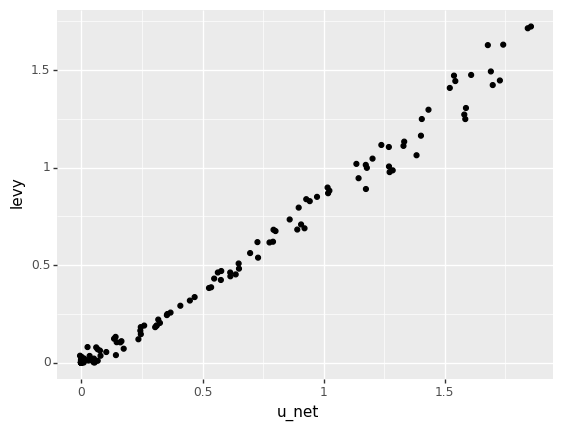

<ggplot: (8740211256081)>

time: 326 ms (started: 2022-05-27 09:25:59 +00:00)


In [ ]:
from pprint import pprint as pp

pp(train.model.get_levy_price())

validation_levy_prices = train.model.get_levy_price(train.validation_sample[0].cpu().detach()) # because only the interior
validation_net_prices = train.model.net(train.validation_sample[0]).reshape(-1).cpu().detach().numpy().tolist()

# u_internal_sample = torch.cat((internal_sample, mequation.pi_net(internal_sample).reshape(-1,1)), dim=1)
# u_net_results = u_net(u_internal_sample).detach().cpu().numpy().reshape(-1).tolist()
# htx_results = Htx(u_internal_sample).cpu().detach().numpy().reshape(-1).tolist()
dataf2 = pd.DataFrame( { 'u_net': validation_net_prices, 
                         'levy': validation_levy_prices } )
ggplot(dataf2, aes(x='u_net', y='levy')) + geom_point()

In [ ]:
seed = 123
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True


nunderlying = 5
net = MultiStockEuropeanOptionNet( nstocks = nunderlying, NL = 5 , NN = 100 )
net.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
msequation = MultiStockEuropeanBlackScholesCall(net, nstocks = nunderlying)
train = TrainMultiStockEuropeanBlackScholesCall(net, msequation, BATCH_SIZE = 2**7, debug = True)

train.hook_interval = 500
train.use_early_stop = True
train.early_stop_patience = 2500
train.validation_sample = msequation.sample(sample_method_X="U", size=2**7)

train.train( epoch =30000 , lr = 0.0001, eqLossFn= 'calculateLoss')

Epoch 0 - lr 0.0001 -  key loss: 0.2606489956378937 - eqWeighted loss: 0.2606489956378937 - Max Loss 0.25983452796936035
Epoch 499 - lr 0.0001 -  key loss: 0.0008281435584649444 - eqWeighted loss: 0.0008281435584649444 - Max Loss 0.0006048369687050581
Epoch 999 - lr 0.0001 -  key loss: 0.0003517964214552194 - eqWeighted loss: 0.0003517964214552194 - Max Loss 0.0002896429505199194
Epoch 1499 - lr 0.0001 -  key loss: 0.00029672030359506607 - eqWeighted loss: 0.00029672030359506607 - Max Loss 0.0002629828522913158
Epoch 1999 - lr 0.0001 -  key loss: 0.0002516436798032373 - eqWeighted loss: 0.0002516436798032373 - Max Loss 0.00022733605874236673
Epoch 2499 - lr 0.0001 -  key loss: 0.00018396624363958836 - eqWeighted loss: 0.00018396624363958836 - Max Loss 0.00015689077554270625
Epoch 2999 - lr 0.0001 -  key loss: 0.00021041040599811822 - eqWeighted loss: 0.00021041040599811822 - Max Loss 0.00018479421851225197
Epoch 3499 - lr 0.0001 -  key loss: 0.00012753262126352638 - eqWeighted loss: 0.

0.06755492366870504


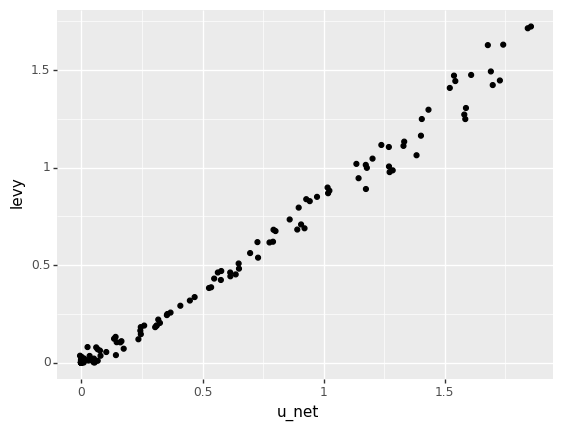

<ggplot: (8740211256081)>

time: 326 ms (started: 2022-05-27 09:25:59 +00:00)


In [ ]:
from pprint import pprint as pp

pp(train.model.get_levy_price())

validation_levy_prices = train.model.get_levy_price(train.validation_sample[0].cpu().detach()) # because only the interior
validation_net_prices = train.model.net(train.validation_sample[0]).reshape(-1).cpu().detach().numpy().tolist()

# u_internal_sample = torch.cat((internal_sample, mequation.pi_net(internal_sample).reshape(-1,1)), dim=1)
# u_net_results = u_net(u_internal_sample).detach().cpu().numpy().reshape(-1).tolist()
# htx_results = Htx(u_internal_sample).cpu().detach().numpy().reshape(-1).tolist()
dataf2 = pd.DataFrame( { 'u_net': validation_net_prices, 
                         'levy': validation_levy_prices } )
ggplot(dataf2, aes(x='u_net', y='levy')) + geom_point()

In [ ]:
# train.history_surfaces_hooks.Epoch.unique()
# # train.history_surfaces_hooks.head(5)
# # train.history_surfaces_hooks[train.history_surfaces_hooks.Epoch == 299]
# train.history_surfaces_hooks[train.history_surfaces_hooks.Epoch == 299].S1

In [ ]:
# size=10
# ndim=3
# rho=0.9

# from torch.distributions.multivariate_normal import MultivariateNormal
# # cov_matrix = np.ones((ndim, ndim))*rho
# # np.fill_diagonal(cov_matrix, 1.0)
# # corrMvn = MultivariateNormal(loc=torch.tensor([0.0]).repeat(ndim), covariance_matrix=torch.tensor(cov_matrix, dtype=torch.float) )  # assuming std_devs of 1
# # # corrMvn.rsample(sample_shape=(10,))
# # corrMvn.sample_n(10)

# norm_dist = torch.distributions.normal.Normal(loc = torch.tensor([0.0]), scale=torch.tensor([1.0]))
# norm_dist.cdf(value= torch.tensor([[0.0, -1.0, 1.0,2.0],[0.0, -1.0, 1.0,2.0]]))
# norm_dist.sample((2,10))

# [i+j for i in range(3) for j in range(3) if i==j]

## Adapted Heat equation with a control

[github.com/pooyasf/DGM](https://github.com/pooyasf/DGM/blob/main/Heat/heat.py)

In [ ]:
class Heat():
    
    def __init__(self , net):
        
        ## for accept reject purpose!
        ## free boundry problems
        self.net = net
        self.weights = None
        self.gamma = 0.01
        self.beta = 5.0

    def sample(self , ts = 0 , te = np.pi , xs = 0 , xe = np.pi , size = 2**8 ):
         x = torch.cat(( torch.rand( [size,1] )*te  , torch.rand( [size,1] )*xe  ) , dim = 1 ).cuda()
         x_initial = torch.cat(( torch.zeros(size, 1)  , torch.rand( [size,1] )*xe  ) , dim = 1 ).cuda()
         x_boundary_start = torch.cat(( torch.rand( [size,1] )*te , torch.zeros(size, 1)  ) , dim = 1 ).cuda()
         x_boundary_end = torch.cat(( torch.rand( [size,1] )*te  , torch.zeros(size, 1) + xe  ) , dim = 1 ).cuda()
         return x , x_initial , x_boundary_start , x_boundary_end
    
    def criterion(self , x , x_initial , x_boundary_0 , x_boundary_pi, loss_transforms = None):
        
        d = torch.autograd.grad(self.net(x), x , grad_outputs=torch.ones_like(self.net(x)) ,\
                                create_graph=True )
        dt = d[0][:,0].reshape(-1,1)
        dx = d[0][:,1].reshape(-1,1)
        # du/dxdx
        dxx = torch.autograd.grad(dx, x , grad_outputs=torch.ones_like(dx) ,\
                                  create_graph = True)[0][:,1].reshape(-1,1)
        if loss_transforms is None:
          loss_transforms = [torch.square]*4

        # Domain 
        DO = loss_transforms[0]( dt - dxx )
        # Terminal Condition
        IC = loss_transforms[1]( (torch.sin(x_initial[:,1].reshape(-1,1) )) - self.net(x_initial) )
        BD_0  = loss_transforms[2]( self.net(x_boundary_0)  - torch.zeros(len(x_boundary_0), 1).cuda() )
        BD_pi = loss_transforms[3]( self.net(x_boundary_pi) - torch.zeros(len(x_boundary_pi), 1).cuda() )
        return  DO , IC , BD_0 , BD_pi

    def calculateLoss(self , size = 2**8 , train = True, loss_transforms = None):
        x , x_initial , x_boundary_0 , x_boundary_pi = self.sample(size)
        x = Variable( x , requires_grad=True)
        DO , IC , BD_0  , BD_pi = self.criterion( x , x_initial , x_boundary_0 , x_boundary_pi , loss_transforms = loss_transforms)
        if train == True:
            return  torch.mean(DO + IC + BD_0 + BD_pi) , torch.mean( DO ) , torch.mean( IC ) , torch.mean( BD_0 + BD_pi ), torch.mean(DO + IC + BD_0 + BD_pi)  
        else:
            return  DO , IC , BD_0 , BD_pi
    
    def exact_solution(self , t , x ):
        return np.sin(x)*np.exp(-1*t)

    # def calculateLossUsingKLMinMax(self , size = 2**8 , train = True):
    #     '''
    #     Helper function that Samples and Calculate loss,
    #     This is adapted in that it changes the weights on the losses
    #     and the distribution of sampling to maximize the loss provided 
    #     the KL distance of the loss is within positive constraints
    #     beta represents the constraints on the weights
    #     gamma represents the constraints on the sampling distribution
    #     (each representing an upper bound the KL distribution)
    #     '''        
    #     x , x_initial , x_boundary_0 , x_boundary_pi = self.sample(size)
    #     x = Variable( x , requires_grad=True)
    #     Ls = self.criterion( x , x_initial , x_boundary_0 , x_boundary_pi )
    #     DO , IC , BD_0  , BD_pi = Ls

    #     if self.weights is None:
    #       self.weights = torch.ones(1,len(Ls)).to(DO.device)/len(Ls)
        
    #     DOt = self.weights[0,0] * torch.pow(1.0/size * torch.sum( torch.exp(self.beta * DO)), self.gamma/self.beta) 
    #     ICt = self.weights[0,1] * torch.pow(1.0/size * torch.sum( torch.exp(self.beta * IC)), self.gamma/self.beta) 
    #     BD_0t = self.weights[0,2] * torch.pow(1.0/size * torch.sum( torch.exp(self.beta * BD_0)), self.gamma/self.beta) 
    #     BD_pit = self.weights[0,2] * torch.pow(1.0/size * torch.sum( torch.exp(self.beta * BD_pi)), self.gamma/self.beta) 
    #     # print([DOt, TCt, BCt, torch.log(DOt + TCt + BCt), 1.0/self.gamma * torch.log(DOt + TCt + BCt)])
    #     # numActive = np.sum([1 if list(lv.size()) else 0 for lv in Ls ])
    #     if train == True:
    #         return  1.0/self.gamma * torch.log(DOt + ICt + BD_0t + BD_pit) , \
    #                  torch.mean(DO) , \
    #                  torch.mean(IC) , \
    #                  torch.mean(BD_0 + BD_pi) , \
    #                  torch.mean(DO + IC + BD_0 + BD_pi)             
    #     else:
    #         return  DO , IC , BD_0  , BD_pi, torch.mean(DO + IC + BD_0 + BD_pi)


time: 80.6 ms (started: 2022-05-26 10:59:52 +00:00)


In [ ]:
class HeatNet(nn.Module):
    
    def __init__(self , NL = 2 , NN = 10 ):
        super(HeatNet, self).__init__()
        
        self.NL = NL
        self.NN = NN
        
        self.fc_input = nn.Linear(2,self.NN)
        #torch.nn.init.xavier_uniform_(self.fc_input.weight)
        
        self.linears = nn.ModuleList([nn.Linear(self.NN, self.NN) for i in range(self.NL)])
        #for i, l in enumerate(self.linears):    
        #    torch.nn.init.xavier_uniform_(l.weight)
        
        self.fc_output = nn.Linear(self.NN,1)
        #torch.nn.init.xavier_uniform_(self.fc_output.weight)
        self.act = torch.tanh
        
    def forward(self, x):
        h = self.act( self.fc_input(x)  )
        for i, l in enumerate(self.linears):
            h = self.act( l(h) )
        out = self.fc_output(h)
        
        return out 

time: 12.6 ms (started: 2022-05-26 10:59:58 +00:00)


In [ ]:
activation_heat = {}
def get_activation_heat(name):
    def hook(model, input, output):
        activation_heat = output.detach()
    return hook

#hooks = {}
#for name, module in net.named_modules():
#    hooks[name] = module.register_forward_hook(get_activation(name))
def register_heat_hook(net):
    net.fc_input.register_forward_hook(get_activation_heat('fc_input'))
    net.linears[0].register_forward_hook(get_activation_heat('linears[0]'))
    net.linears[1].register_forward_hook(get_activation_heat('linears[1]'))
    net.fc_output.register_forward_hook(get_activation_heat('fc_output'))


time: 4.32 ms (started: 2022-05-26 11:00:08 +00:00)


In [ ]:
class TrainHeat():

    def __init__(self , net , heatequation , BATCH_SIZE , debug = False):
        self.history_mean_hooks = []
        self.history_surfaces_hooks = []
        self.history_tl = []
        self.history_dl = []
        self.history_il = []
        self.history_bl = []
        self.BATCH_SIZE = BATCH_SIZE
        self.net = net
        self.model = heatequation
        self.debug = debug
        if self.debug == True:
            self.hooks = {}
            self.get_all_layers_heat(self.net)
    
    def train(self , epoch , lr, eqLossFn = 'calculateLoss', save_pics = False):
        optimizer = optim.Adam(self.net.parameters(), lr)
        # optimizer = optim.SGD(self.net.parameters(), lr)
        loss_avg = 0

        loss_calc_method = None
        try:
            loss_calc_method = getattr(self.model, eqLossFn)
        except AttributeError:
            raise NotImplementedError("Class `{}` does not implement `{}`".format(self.model.__class__.__name__, eqLossFn))

        # pdb.set_trace()

        for e in range(epoch):
            optimizer.zero_grad()
            loss , Ls1 , Ls2 , Ls3 , losses_equalWeightedByType= loss_calc_method( self.BATCH_SIZE )
            loss_avg = loss_avg + float(loss.item())
            loss.backward()
            optimizer.step()
            if e % 50 == 49:
                loss = loss_avg/50
                # max_loss = torch.max(Ls1, Ls2, Ls3)
                l1_loss, _, _, _, _ = self.model.calculateLoss(self.BATCH_SIZE, loss_transforms = [torch.abs]*4)
                print("Epoch {} - lr {} - rebalanced loss: {} - original loss: {} - L1 loss {}".format(e , lr , loss, losses_equalWeightedByType, l1_loss ))
                loss_avg = 0
                if save_pics:
                  #history_validation_de.append( validate_DE()[0] )
                  plt.ioff()
                  y_range = np.linspace(0, np.pi, 40, dtype=np.float)
                  x_range = np.linspace(0, np.pi, 40, dtype=np.float)
                  data = np.empty((2,1))
                  Z = []
                  for _x in x_range:
                      data[0] = _x
                      for _y in y_range:
                          data[1] = _y
                          indata = torch.Tensor(data.reshape(1,-1)).cuda()
                          Zdata = self.net(indata).detach().cpu().float().item()
                          Z.append(Zdata)
                  _X, _Y = np.meshgrid(x_range, y_range, indexing='ij')
                  Z_surface = np.reshape(Z, (x_range.shape[0], y_range.shape[0]))
                  # plot
                  fig = plt.figure()
                  ax = fig.gca(projection='3d')
                  ax.set_zlim([-0.2,1.2])
                  # pdb.set_trace()
                  ax.plot_surface( _X, _Y, Z_surface,  cmap=cm.YlOrBr_r, edgecolor='black', linewidth=0.0004, antialiased=True)
                  ax.set_xlabel(' T ')
                  ax.set_ylabel(' X ')
                  ax.set_zlabel(' H ')
                  #ax.legend(fontsize=8)
                  path = f"/content/drive/MyDrive/data_papers/{paper_name}/summary_results/temp/{e}.png"
                  plt.savefig(path)
                  plt.close(fig)
                
                ## report detailed loss ##
                tl , dl , il , bl, old_l = self.model.calculateLoss( 2**8 )
                self.history_tl.append( tl )
                self.history_dl.append( dl )
                self.history_il.append( il )
                self.history_bl.append( bl )
                
                if self.debug == True:
                    mean = []
                    for l in self.hooks:
                        mean.append(torch.mean( self.hooks[l] ).item())
                    self.history_mean_hooks.append( mean )
            
    def plot_report_heat(self):

        fig, ax = plt.subplots(4, 1 ,constrained_layout=True)
        ax[0].plot( np.log(self.history_tl) , '-b', label='total')
        ax[0].set_title('total')
        fig.suptitle('Training Loss', fontsize=10)
        ax[1].plot( np.log(self.history_dl) )
        ax[1].set_title('diff operator')
        ax[2].plot( np.log(self.history_il) )
        ax[2].set_title('initial condition')
        ax[3].plot( np.log(self.history_bl) )
        ax[3].set_title('boundry condition')
    
    def hook_fn_heat(self, m, i, o):
              self.hooks[m] = o.detach()
            
    def get_all_layers_heat(self, net):
      for name, layer in net._modules.items():
          if isinstance(layer, nn.ModuleList):
              for n , l in layer.named_children():
                l.register_forward_hook(self.hook_fn_heat)
          else:
              # it's a non sequential. Register a hook
              layer.register_forward_hook(self.hook_fn_heat)
    
    def plot_activation_mean_heat(self):
        
        if self.debug == False:
            print( 'error: debug is off , turn it on and train again ' )
        else:
            history = np.array(self.history_mean_hooks)
            jet= plt.get_cmap('jet')
            colors = iter(jet(np.linspace(0,1,10)))
            fig, ax = plt.subplots()
            for i in range(history.shape[1]):
                ax.plot(history[:,i], '--r', label= i , color=next(colors) )
            
            fig.suptitle('Layers activation mean value', fontsize=10)
            leg = ax.legend();


time: 154 ms (started: 2022-05-26 11:00:08 +00:00)


In [ ]:
heat_net = HeatNet( NL = 2 , NN = 20 )
heat_net.to(torch.device("cuda:0"))  

## providing sampler with net so it can accept/reject based on net and other criterions
heatequation = Heat(heat_net)
#register_hook(net)
    
train = TrainHeat( heat_net , heatequation , BATCH_SIZE = 2**8 , debug = True )
#%%
train.train( epoch = 3000 , lr = 0.0001, eqLossFn = 'calculateLoss')

Epoch 49 - lr 0.0001 - rebalanced loss: 0.5056189090013504 - original loss: 0.44934314489364624 - L1 loss 0.7790582776069641
Epoch 99 - lr 0.0001 - rebalanced loss: 0.4039174920320511 - original loss: 0.3661675453186035 - L1 loss 0.7696151733398438
Epoch 149 - lr 0.0001 - rebalanced loss: 0.34158959686756135 - original loss: 0.3103456199169159 - L1 loss 0.7901034951210022
Epoch 199 - lr 0.0001 - rebalanced loss: 0.30575873613357546 - original loss: 0.2964978516101837 - L1 loss 0.7794448137283325
Epoch 249 - lr 0.0001 - rebalanced loss: 0.2770907700061798 - original loss: 0.2552706003189087 - L1 loss 0.7207360863685608
Epoch 299 - lr 0.0001 - rebalanced loss: 0.2581018394231796 - original loss: 0.2408275455236435 - L1 loss 0.7673238515853882
Epoch 349 - lr 0.0001 - rebalanced loss: 0.24002969413995742 - original loss: 0.2213743031024933 - L1 loss 0.7521560788154602
Epoch 399 - lr 0.0001 - rebalanced loss: 0.2293036785721779 - original loss: 0.22227051854133606 - L1 loss 0.72679734230041

In [ ]:
heat_net2 = HeatNet( NL = 2 , NN = 20 )
heat_net2.to(torch.device("cuda:0"))  

## providing sampler with net so it can accept/reject based on net and other criterions
heatequation2 = Heat(heat_net2)
#register_hook(net)
    
train2 = TrainHeat( heat_net2 , heatequation2 , BATCH_SIZE = 2**8 , debug = True )
#%%
train2.train( epoch = 3000 , lr = 0.0001, eqLossFn = 'calculateLossUsingKLMinMax')

Epoch 49 - lr 0.0001 - rebalanced loss: 0.10814771756529808 - original loss: 0.30061230063438416 - L1 loss 0.8462585210800171
Epoch 99 - lr 0.0001 - rebalanced loss: 0.08895048454403877 - original loss: 0.26801806688308716 - L1 loss 0.8047064542770386
Epoch 149 - lr 0.0001 - rebalanced loss: 0.07520867869257927 - original loss: 0.22924689948558807 - L1 loss 0.788983941078186
Epoch 199 - lr 0.0001 - rebalanced loss: 0.06680136889219285 - original loss: 0.21298441290855408 - L1 loss 0.7401078939437866
Epoch 249 - lr 0.0001 - rebalanced loss: 0.06160075820982456 - original loss: 0.20415103435516357 - L1 loss 0.7423343658447266
Epoch 299 - lr 0.0001 - rebalanced loss: 0.05805354759097099 - original loss: 0.2011408656835556 - L1 loss 0.7170853614807129
Epoch 349 - lr 0.0001 - rebalanced loss: 0.054812652543187144 - original loss: 0.183389812707901 - L1 loss 0.7001839876174927
Epoch 399 - lr 0.0001 - rebalanced loss: 0.0524990826100111 - original loss: 0.18329104781150818 - L1 loss 0.6509301

In [ ]:
heat_net2 = HeatNet( NL = 2 , NN = 20 )
heat_net2.to(torch.device("cuda:0"))  

## providing sampler with net so it can accept/reject based on net and other criterions
heatequation2 = Heat(heat_net2)

#register_hook(net)
    
train2 = TrainHeat( heat_net2 , heatequation2 , BATCH_SIZE = 2**8 , debug = True )
#%%
train2.train( epoch = 3000 , lr = 0.0001, eqLossFn = 'calculateLossUsingKLMinMax')

Epoch 49 - lr 0.0001 - rebalanced loss: 0.20206966787576675 - original loss: 0.4127390384674072
Epoch 99 - lr 0.0001 - rebalanced loss: 0.15180848747491837 - original loss: 0.39203816652297974
Epoch 149 - lr 0.0001 - rebalanced loss: 0.14186561584472657 - original loss: 0.36039239168167114
Epoch 199 - lr 0.0001 - rebalanced loss: 0.13009952276945114 - original loss: 0.3376663625240326
Epoch 249 - lr 0.0001 - rebalanced loss: 0.12217730835080147 - original loss: 0.3325193524360657
Epoch 299 - lr 0.0001 - rebalanced loss: 0.11404094442725182 - original loss: 0.29036784172058105
Epoch 349 - lr 0.0001 - rebalanced loss: 0.10581339374184609 - original loss: 0.2698376476764679
Epoch 399 - lr 0.0001 - rebalanced loss: 0.10039236679673195 - original loss: 0.26930856704711914
Epoch 449 - lr 0.0001 - rebalanced loss: 0.0958828592300415 - original loss: 0.25296616554260254
Epoch 499 - lr 0.0001 - rebalanced loss: 0.09149332016706467 - original loss: 0.21302446722984314
Epoch 549 - lr 0.0001 - reb

## Fast American Option Pricing - Andersen

In [ ]:
sys.path.insert(0, '/content/drive/MyDrive/FastAmericanOptionPricing-master/')

time: 792 µs (started: 2022-05-25 09:13:07 +00:00)


In [ ]:
from FastAmericanOptionSolverA import *
from multiprocessing import Pool

time: 2.45 s (started: 2022-05-25 09:13:07 +00:00)


In [ ]:
# unit test one for valuing American option
r = 0.04     # risk free
q = 0.01      # dividend yield
K = 100.0       # strike
S = 80.0        # underlying spot
sigma = 0.2  # volatility
T = 3.0         # maturity
option_type = qd.OptionType.Put

solver = FastAmericanOptionSolverA(r, q, sigma, K, T, option_type)
solver.use_derivative = False
solver.iter_tol = 1e-5
solver.max_iters = 20
price = solver.solve(0.0, S)   # t and S



step 1. checking collocation points ...

collocation point = [3.00000000e+00 2.89864827e+00 2.61153811e+00 2.18566017e+00
 1.68750000e+00 1.18846904e+00 7.50000000e-01 4.12011906e-01
 1.87500000e-01 6.43398282e-02 1.34618943e-02 8.70786986e-04
 0.00000000e+00]

step 3. checking numerical integration ...

analytical sol = 8102.083927575384, numerical sol = 8102.083927575392, err = 8.185452315956354e-12

step 4. checking QD+ alogrithm ...

B guess = [72.02819841893911, 72.2261530824679, 72.83080955080466, 73.8730793788191, 75.39919417881895, 77.46136253500606, 80.10183400374555, 83.32751539766585, 87.07195514307985, 91.14275103011242, 95.15621577013005, 98.46286556928261, 100.0]

tau  = [3.00000000e+00 2.89864827e+00 2.61153811e+00 2.18566017e+00
 1.68750000e+00 1.18846904e+00 7.50000000e-01 4.12011906e-01
 1.87500000e-01 6.43398282e-02 1.34618943e-02 8.70786986e-04
 0.00000000e+00]

step 5. starting iteration ...

  iter = 1, err = 1.3186247834719795

match condition err2 = 1.9903057466

In [ ]:
print("european price = ", solver.european_price)
print("american price = ", price)

european price =  17.78865238332743
american price =  21.135486471314067
time: 1.57 ms (started: 2022-05-25 09:13:15 +00:00)


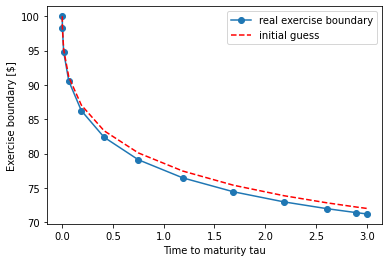

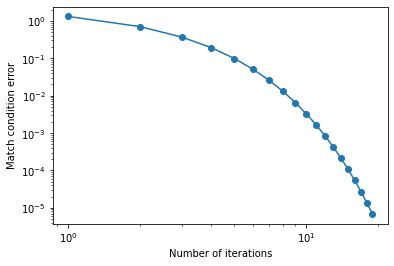

time: 838 ms (started: 2022-05-25 09:13:15 +00:00)


In [ ]:
#make a plot for exercise boundary
plt.plot(solver.shared_tau, solver.shared_B, 'o-')
plt.plot(solver.shared_tau, solver.shared_B0, 'r--')
plt.legend(["real exercise boundary", "initial guess"])
plt.xlabel("Time to maturity tau")
plt.ylabel("Exercise boundary [$]")
plt.show()

plt.figure(2)
iters = np.array([float(x[0]) for x in solver.iter_records])
errors = np.array([x[1] for x in solver.iter_records])
plt.loglog(iters, errors, 'o-')
plt.xlabel("Number of iterations")
plt.ylabel("Match condition error")
plt.show()


In [ ]:
from EuropeanOptionSolver import EuropeanOption

r = 0.04  # risk free
q = 0.04  # dividend yield
K = 100  # strike
S0 = 80  # underlying spot
sigma = 0.2  # volatility
T = 3.0  # maturity
put = EuropeanOption.european_put_value(T, S0, r, q, sigma, K)
call =  EuropeanOption.european_call_value(T, K, q, r, sigma , S0)
print("call = ", call, ", put = ", put)

call =  22.014186418796882 , put =  22.014186418796903
time: 4.75 ms (started: 2022-05-25 09:13:16 +00:00)


## Single Stock American Call option - sampling methodology




#### AmericanOptionNet

In [ ]:
class AmericanOptionNet(nn.Module):
    def __init__(self , NL  , NN, activation = torch.tanh  ):
        super(AmericanOptionNet, self).__init__()
        self.NL = NL
        self.NN = NN
        ### Number of stocks + time
        ### ( t , xi)
        self.Input = 1 + 1
        self.fc_input = nn.Linear(self.Input,self.NN)
        torch.nn.init.xavier_uniform_(self.fc_input.weight)
        self.linears = nn.ModuleList([nn.Linear(self.NN, self.NN) for i in range(self.NL)])
        for i, l in enumerate(self.linears):    
            torch.nn.init.xavier_uniform_(l.weight)
        self.fc_output = nn.Linear(self.NN,1)
        torch.nn.init.xavier_uniform_(self.fc_output.weight)
        self.act = activation
        
    def forward(self, x):
        # pdb.set_trace()
        h = self.act( self.fc_input(x)  )
        for i, l in enumerate(self.linears):
            h = self.act( l(h) )
        out = self.fc_output(h)
        return out 
    

time: 12.7 ms (started: 2022-05-24 11:40:11 +00:00)


#### AmericanBlackScholesSingleStock

In [ ]:

class AmericanBlackScholesSingleStock():
    
    def __init__(self , net, is_call = True):

        self.C = 0.0
        self.R = 0.05         # Interest Rate (Yearly)

        self.SIGMA = 0.25  # Volatility (Yearly)
        self.RU = 1.0      # stock corrolation
        
        self.K = 50.0              # Strike Price 
        self.T = 1.0               # Maturation time (in YEAR)
        self.MAX_X = self.K*3.0   # MAX price
        ## for accept reject purpose!
        ## free boundry problems
        self.net = net
        
        self.weights = None
        self.eps = 1E9
        self.weights_tbl = []
        
        self.gamma = 0.0001
        self.beta = 0.0001
        
        self.is_call = is_call
        self.log_normal_dist = torch.distributions.LogNormal(self.R-self.C, self.SIGMA)
        self.log_normal_dist_5 = torch.distributions.LogNormal(self.R-self.C, self.SIGMA*5.0)

    def reset_weights(self):
        self.weights = None
        self.eps = 1E9
        self.weights_tbl = []

    def g(self , x):
        # pay off function - 1 is the stock dimension, 0 is the time dimension
        if self.is_call:
          return torch.max( x[:,1].reshape(-1,1) - self.K , torch.zeros([len(x),1]).cuda() ) 
        else:
          return torch.max( self.K - x[:,1].reshape(-1,1) , torch.zeros([len(x),1]).cuda() ) 


    def mu(self, x):
        ## should test it! output dimension is important !
        return (self.R-self.C)*x.reshape(-1,1)

    def sigma(self , x):
        return self.SIGMA*x.reshape(-1,1)

    def sample(self , sample_method_X = "U", size = 2**8 ):
        '''
        Sampling function
        '''
        ### Domain (above boundry)
        # xsetup = [torch.rand( [size,1] )*self.T]
        # for xi in range(self.net.Input-1):
        #   xsetup.append(torch.rand( [size,1] )*self.MAX_X)
        # x = torch.cat(tuple(xsetup), dim = 1 ).cuda() 

        if sample_method_X in ["U","UE3"] :
            
            range_multiplier = 3.0 if sample_method_X == "UE3" else 1.0
            # above current pay-off samples
            x = torch.cat(( torch.rand([size,1])*self.T , -self.MAX_X*range_multiplier*torch.rand([size, 1])+self.MAX_X*range_multiplier) , dim = 1 ).cuda()

            # pdb.set_trace()
            compare = self.net(x) - self.g(x)
            mask = compare > 0
            # pdb.set_trace()

            x = x[mask.reshape(-1),:]
            ## repeat for each d (dimension)
            # mask = mask.repeat(1,4)
            # x = x[mask].reshape(-1,4)

            ### Terminal time samples
            x_terminal = torch.cat( ( torch.zeros(size, 1) + self.T , -self.MAX_X*range_multiplier*torch.rand([size, 1])+self.MAX_X*range_multiplier ) , dim = 1 ).cuda()
            
            ### under current pay-off samples
            x_boundary = torch.cat(( torch.rand([size,1])*self.T , -self.MAX_X*range_multiplier*torch.rand([size, 1])+self.MAX_X*range_multiplier) , dim = 1 ).cuda()
            compare = self.net(x_boundary) - self.g(x_boundary)
            mask = compare < 0
            x_boundary = x_boundary[mask.reshape(-1),:]
            
            # ## repeat for each d (dimension)
            # mask = mask.repeat(1,4)
            # x_boundary = x_boundary[mask].reshape(-1,4)
            ###
            return x , x_terminal , x_boundary

    
        if sample_method_X in ["LN", "LN5"]:

            ln_dist = self.log_normal_dist_5 if sample_method_X == "LN5" else self.log_normal_dist
            # above current pay-off samples
            # pdb.set_trace()
            x = torch.cat(( torch.rand([size,1])*self.T , torch.maximum(ln_dist.sample((size,)).reshape(-1,1)*self.K,torch.Tensor([0.0]))   ) , dim = 1 ).cuda()
            compare = self.net(x) - self.g(x)
            mask = compare > 0
            x = x[mask.reshape(-1),:]

            ### Terminal time samples
            x_terminal = torch.cat( ( torch.zeros(size, 1) + self.T , torch.maximum(ln_dist.sample((size,)).reshape(-1,1)*self.K,torch.Tensor([0.0])) ) , dim = 1 ).cuda()
            ### under current pay-off samples
            x_boundary = torch.cat(( torch.rand( [size,1] )*self.T , torch.maximum(ln_dist.sample((size,)).reshape(-1,1)*self.K,torch.Tensor([0.0])) ) , dim = 1 ).cuda()

            compare = self.net(x_boundary) - self.g(x_boundary)
            mask = compare < 0
            x_boundary = x_boundary[mask.reshape(-1),:]
            
            return x , x_terminal , x_boundary

        raise ValueError(f"{sample_method_X} is not a supported sampling method")
    
    def criterion(self , x , x_terminal , x_boundary, loss_transform = None):
        '''
        Loss function that helps network find solution to equation
        '''   
        # pdb.set_trace()     
        d = torch.autograd.grad(
            self.net(x), 
            x , 
            grad_outputs=torch.ones_like(self.net(x)) ,
            create_graph=True )
        
        dt  = d[0][:,0].reshape(-1,1)
        dx1 = d[0][:,1].reshape(-1,1)
        
        # du/dxdx
        dx1x1 = torch.autograd.grad(dx1, 
                                    x , 
                                    grad_outputs=torch.ones_like(dx1) ,
                                    create_graph = True)[0][:,1].reshape(-1,1)
        
        if loss_transform is None:
          loss_transform = torch.square

        DO = None
        TC = None
        BC = None

        if len(x) == 0:
          # print('zero batch size for domain!')
          DO = torch.tensor(0).cuda().float()
        else:
          # x is above the free boundary ( so immediate pay-off is positive )
          above_boundary = dt + self.mu(x[:,1])*( dx1 ) + 0.5*( (self.sigma(x[:,1])*self.sigma(x[:,1]))*dx1x1 ) - self.R*self.net(x)
          DO = loss_transform(above_boundary)
          # 4.1 in paper - note self.net(x) for u(x,t), difference supposed to be zero
          # Domain 
          #DO = (dt + 0.5*self.RU*(self.SIGMA**2)*(x[:,1].reshape(-1,1)**2)*dxx - self.R*self.net(x) + (self.R-self.C)*x[:,1].reshape(-1,1)*dx)**2

        # Terminal Condition - should be equal (both in- and out of the money)
        TC = loss_transform( self.g(x_terminal) - self.net(x_terminal) )

        # Boundary Condition - below the payoff value, it should still be worth something for optionality
        # len() is safe here , because it just shows batch number 
        if( len(x_boundary) != 0):
            BC = loss_transform( torch.max( self.g(x_boundary) - self.net(x_boundary) , torch.zeros([len(x_boundary),1]).cuda() ) )
        else:
            # print('zero batch size for outside domain!')
            BC = torch.tensor(0).cuda().float()
        return  DO , TC , BC

    def calculateLoss(self , size = 2**8 , train = True, loss_transform = None, keep_batch = False, sample_method_X = "U"):
        '''
        Helper function that Sample and Calculate loss,
        '''        
        x , x_terminal , x_boundary = self.sample(sample_method_X, size)
        x = Variable( x , requires_grad=True)
        Ls = self.criterion( x , x_terminal , x_boundary, loss_transform = loss_transform )
        DO , TC , BC = Ls

        numActive = np.sum([1 if list(lv.size()) else 0 for lv in Ls ])
        # DOm = torch.mean(DO).detach().cpu().float().item()
        # TCm = torch.mean(TC).detach().cpu().float().item()
        # BCm = torch.mean(BC).detach().cpu().float().item()

        if not keep_batch:
          loss_equalWeightedByType = (1./numActive*torch.mean(DO) + 1./numActive*torch.mean(TC) + 1./numActive*torch.mean(BC))
          return  loss_equalWeightedByType , 1./numActive*torch.mean(DO) , 1./numActive*torch.mean(TC) , 1./numActive*torch.mean(BC) , loss_equalWeightedByType             
        else:
          return DO.numpy(), TC.numpy(), BC.numpy(), DO.numpy(), TC.numpy(), BC.numpy()

    def calculateLossUsingKLMinMax(self , size = 2**8 , train = True, loss_transform = None, sample_method_X = "U"):
        '''
        Helper function that Samples and Calculate loss,
        This is adapted in that it changes the weights on the losses
        and the distribution of sampling to maximize the loss provided 
        the KL distance of the loss is within positive constraints
        beta represents the constraints on the weights
        gamma represents the constraints on the sampling distribution
        (each representing an upper bound the KL distribution)
        '''        
        x , x_terminal , x_boundary = self.sample(sample_method_X, size)
        x = Variable( x, requires_grad=True)
        # pdb.set_trace()
        Ls = self.criterion( x , x_terminal , x_boundary, loss_transform = loss_transform)
        DO , TC , BC = Ls
        if self.weights is None:
          self.weights = torch.ones(1,len(Ls)).to(DO.device)/len(Ls)
        
        DOt = self.weights[0,0] * torch.pow(1.0/size * torch.sum( torch.exp(self.beta * DO)), self.gamma/self.beta) 
        TCt = self.weights[0,1] * torch.pow(1.0/size * torch.sum( torch.exp(self.beta * TC)), self.gamma/self.beta) 
        BCt = self.weights[0,2] * torch.pow(1.0/size * torch.sum( torch.exp(self.beta * BC)), self.gamma/self.beta) 

        # print([DOt, TCt, BCt, torch.log(DOt + TCt + BCt), 1.0/self.gamma * torch.log(DOt + TCt + BCt)])

        numActive = np.sum([1 if list(lv.size()) else 0 for lv in Ls ])
        transformed_loss = 1.0/self.gamma * torch.log(DOt + TCt + BCt)
        loss_equalWeightedByType = (1./numActive*torch.mean(DO) + 1./numActive*torch.mean(TC) + 1./numActive*torch.mean(BC))
        # print((DOt.detach().cpu().item(), TCt.detach().cpu().item(), BCt.detach().cpu().item(), transformed_loss.detach().cpu().item()))
        return   transformed_loss, 1./numActive*torch.mean(DO) , 1./numActive*torch.mean(TC) , 1./numActive*torch.mean(BC) , loss_equalWeightedByType

    

time: 382 ms (started: 2022-05-24 11:40:12 +00:00)


In [ ]:
# torch.maximum(torch.Tensor([1.2, -12.6, 56.33]),torch.Tensor([0.0]))
# loss_terms = [ 34.25, 100.12, 23.45]
# target = torch.tensor([1./len(loss_terms)]*len(loss_terms))*loss_terms

time: 692 µs (started: 2022-05-24 11:40:12 +00:00)


#### TrainAmericanBlackScholesSingleStock

In [ ]:
class TrainAmericanBlackScholesSingleStock():
    
    def __init__(self , net , equation , BATCH_SIZE , debug = False):
        self.history_mean_hooks = [] 
        self.history_surfaces_hooks = None       
        self.history_tl = []
        self.history_dl = []
        self.history_il = []
        self.history_bl = []              
        self.BATCH_SIZE = BATCH_SIZE
        self.net = net
        self.model = equation        
        self.debug = debug  
        self.hook_interval = 20      
        if self.debug == True:
            self.hooks = {}            
            self.get_all_layers(self.net)

        self.use_early_stop = False
        self.early_stop_patience = 10
        self.early_stop_delta = 0.0        
        self.best_loss = np.Inf
        self.early_stop_counter = 0
        
        self.stop_epoch = 0

    
    def train(self , epoch , lr, eqLossFn = 'calculateLoss', sample_method_X = "U"):
        optimizer = optim.Adam(self.net.parameters(), lr)
        # optimizer = optim.SGD(self.net.parameters(), lr)
        loss_avg = 0
        loss_calc_method = None
        try:
            loss_calc_method = getattr(self.model, eqLossFn)
        except AttributeError:
            raise NotImplementedError("Class `{}` does not implement `{}`".format(self.model.__class__.__name__, eqLossFn))
        
        for e in range(epoch):
            optimizer.zero_grad()
            #pdb.set_trace()
            loss , dom , tcm , bcm, losses_equalWeightedByType = loss_calc_method( self.BATCH_SIZE, sample_method_X = sample_method_X )
            l1_loss, _, _, _, _ = self.model.calculateLoss( 2**7, loss_transform = torch.abs, sample_method_X = sample_method_X)

            # if e % 50 == 0:
            #   print(f"{loss}, {dom}, {tcm}, {bcm}, {losses_equalWeightedByType}")

            if self.use_early_stop:
              if losses_equalWeightedByType < (self.best_loss-self.early_stop_delta):
                self.best_loss = losses_equalWeightedByType
                self.early_stop_counter = 0
                # print(f"New Loss to beat for early Stop at epoch {e}, original loss: {losses_equalWeightedByType} with patience {self.early_stop_patience}")
              else:
                self.early_stop_counter += 1
              if self.early_stop_counter>=self.early_stop_patience:
                print(f"Early Stop at epoch {e}, original loss: {losses_equalWeightedByType} with patience {self.early_stop_patience}")
                break
            loss_avg = loss_avg + float(loss.item())
            loss.backward()
            optimizer.step()
            if (e % self.hook_interval == (self.hook_interval-1)) or e == 0:
                loss = loss_avg/self.hook_interval
                print("Epoch {} - lr {} -  rebalanced loss: {} - original loss: {} - L1 loss {}".format(e , lr , loss, losses_equalWeightedByType, l1_loss))
                loss_avg = 0
                ## report detailed loss ## ## puting inside no grad??? for memory optimization!
                # tl , dl , il , bl, _ = self.model.calculateLoss( 2**6 )  # note that this is the standard loss!!
                self.history_tl.append( loss )
                self.history_dl.append( dom )
                self.history_il.append( tcm )
                self.history_bl.append( bcm )
                if self.debug == True:
                    mean = []
                    for l in self.hooks:
                        mean.append(torch.mean( self.hooks[l] ).item())
                    self.history_mean_hooks.append( mean )
                    xabove, xterminal, xbelow = self.model.sample(sample_method_X, 2**9)
                    xabove_res = self.model.net(xabove).detach()
                    xterminal_res = self.model.net(xterminal).detach()
                    xbelow_res = self.model.net(xbelow).detach()
                    # pdb.set_trace()
                    df_above = self.create_result_df(e, xabove, xabove_res, "ABOVE")
                    df_terminal = self.create_result_df(e, xterminal, xterminal_res, "TERMINAL")
                    df_below = self.create_result_df(e, xbelow, xbelow_res, "BELOW")
                    if self.history_surfaces_hooks is None:
                      self.history_surfaces_hooks = pd.concat([df_above, df_terminal, df_below],axis=0)
                    else:
                      self.history_surfaces_hooks = pd.concat([self.history_surfaces_hooks,pd.concat([df_above, df_terminal, df_below],axis=0) ], axis=0)
        self.stop_epoch = e
                    
    def hook_fn(self, m, i, o):
              self.hooks[m] = o.detach()
            
    def get_all_layers(self, net):
      for name, layer in net._modules.items():
          if isinstance(layer, nn.ModuleList):
              for n , l in layer.named_children():
                l.register_forward_hook(self.hook_fn)
          else:
              # it's a non sequential. Register a hook
              layer.register_forward_hook(self.hook_fn)
    
    def create_result_df(self, e, x, x_res, sample_type):
      df_above = pd.DataFrame(x.cpu().numpy(), columns = ["Time", "S1"])
      df_above["Epoch"] = e
      df_above["Sample"] = sample_type
      df_above["Result"] = x_res.cpu().numpy()
      return df_above



time: 109 ms (started: 2022-05-24 10:47:52 +00:00)


#### American Call - Standard Loss, Uniform sampling , NL=3, NN=30, lr = 0.01

In [ ]:
eqLossFn= 'calculateLoss'
sample_method= "U"
lr = 0.01
net = AmericanOptionNet( NL = 3 , NN = 30 )
net.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
bsequation = AmericanBlackScholesSingleStock(net)
trainAmss = TrainAmericanBlackScholesSingleStock( net , bsequation , BATCH_SIZE = 2**9 , debug = True )
trainAmss.hook_interval = 1000
trainAmss.use_early_stop = True
trainAmss.early_stop_patience = 2000
trainAmss.train( epoch = 10000 , lr = 0.01, eqLossFn= eqLossFn , sample_method_X= sample_method)

Epoch 0 - lr 0.01 -  rebalanced loss: 2.227487548828125 - original loss: 2227.487548828125 - L1 loss 35.26634979248047
Epoch 999 - lr 0.01 -  rebalanced loss: 768.0924981613159 - original loss: 117.31851959228516 - L1 loss 7.09603214263916
Epoch 1999 - lr 0.01 -  rebalanced loss: 35.52297046303749 - original loss: 31.008892059326172 - L1 loss 4.148499488830566
Epoch 2999 - lr 0.01 -  rebalanced loss: 2.0480426743626596 - original loss: 0.13487450778484344 - L1 loss 0.19275487959384918
Epoch 3999 - lr 0.01 -  rebalanced loss: 10.896574376031756 - original loss: 36.51483154296875 - L1 loss 2.7180709838867188
Epoch 4999 - lr 0.01 -  rebalanced loss: 36.87523343847692 - original loss: 0.37389522790908813 - L1 loss 0.36691999435424805
Early Stop at epoch 5388, original loss: 0.4675107002258301 with patience 2000
time: 1min 40s (started: 2022-05-24 11:40:15 +00:00)


In [ ]:
df = trainAmss.history_surfaces_hooks[trainAmss.history_surfaces_hooks.Epoch == max(trainAmss.history_surfaces_hooks.Epoch)]
fig = px.scatter_3d(df, x='Time', y='S1', z='Result',color='Sample', width=500, height=400)
fig.show()

In [ ]:
torch.save(net.state_dict(), f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/AmCallSs_{datetime.datetime.now():%Y%m%d%H%M%S}_{eqLossFn}_{sample_method}_{trainAmss.stop_epoch}_{str(lr).replace('.','p')}_{net.NL}_{net.NN}")
# torch.save(model.state_dict(), PATH)

time: 15.2 ms (started: 2022-05-24 11:47:55 +00:00)


In [ ]:
# testmodel = AmericanOptionNet(NL = 3, NN = 30)
# print(os.listdir(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals"))
# testmodel.load_state_dict(torch.load(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/AmCallSs_20220504153012_calculateLoss_U_5558_3_30"))
# testmodel.forward(bsequation.sample("U", 2**4)[0].cpu().detach())

<All keys matched successfully>

In [ ]:
# %pip install pytorchtools
# lr = 0.001
# str(lr).replace('.','p')

'0p001'

#### American Call - Standard Loss, Uniform sampling , NL=5, NN=100, lr = 0.001

In [ ]:
eqLossFn= 'calculateLoss'
sample_method= "U"
lr = 0.001
net5 = AmericanOptionNet( NL = 5 , NN = 100 )
net5.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
bsequation_net5 = AmericanBlackScholesSingleStock(net5)
trainAmss_net5 = TrainAmericanBlackScholesSingleStock( net5 , bsequation_net5 , BATCH_SIZE = 2**9 , debug = True )
trainAmss_net5.hook_interval = 1000
trainAmss_net5.use_early_stop = True
trainAmss_net5.early_stop_patience = 2000
trainAmss_net5.train( epoch = 10000 , lr = lr, eqLossFn= eqLossFn , sample_method_X= sample_method)
torch.save(net5.state_dict(), f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/AmCallSs_{datetime.datetime.now():%Y%m%d%H%M%S}_{eqLossFn}_{sample_method}_{trainAmss_net5.stop_epoch}_{str(lr).replace('.','p')}_{net5.NL}_{net5.NN}")
df_net5 = trainAmss_net5.history_surfaces_hooks[trainAmss_net5.history_surfaces_hooks.Epoch == max(trainAmss_net5.history_surfaces_hooks.Epoch)]
fig_net5 = px.scatter_3d(df_net5, x='Time', y='S1', z='Result',color='Sample', width=500, height=400)
fig_net5.show()

Epoch 0 - lr 0.001 -  rebalanced loss: 1.446651123046875 - original loss: 1446.651123046875 - L1 loss 19.132484436035156


KeyboardInterrupt: ignored

time: 3.29 s (started: 2022-05-24 11:52:48 +00:00)


#### American Call - Standard Loss, LN sampling , NL=5, NN=100, lr = 0.0001

In [ ]:
eqLossFn= 'calculateLoss'
sample_method= "LN"
lr = 0.0001
net5 = AmericanOptionNet( NL = 5 , NN = 100 )
net5.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
bsequation_net5 = AmericanBlackScholesSingleStock(net5)
trainAmss_net5 = TrainAmericanBlackScholesSingleStock( net5 , bsequation_net5 , BATCH_SIZE = 2**9 , debug = True )
trainAmss_net5.hook_interval = 1000
trainAmss_net5.use_early_stop = True
trainAmss_net5.early_stop_patience = 2000
trainAmss_net5.train( epoch = 10000 , lr = lr, eqLossFn= eqLossFn , sample_method_X= sample_method)
torch.save(net5.state_dict(), f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/AmCallSs_{datetime.datetime.now():%Y%m%d%H%M%S}_{eqLossFn}_{sample_method}_{trainAmss_net5.stop_epoch}_{str(lr).replace('.','p')}_{net5.NL}_{net5.NN}")

In [ ]:
df_net5 = trainAmss_net5.history_surfaces_hooks[trainAmss_net5.history_surfaces_hooks.Epoch == max(trainAmss_net5.history_surfaces_hooks.Epoch)]
fig_net5 = px.scatter_3d(df_net5, x='Time', y='S1', z='Result',color='Sample', width=500, height=400)
fig_net5.show()

#### American Call - KLMinMax, Uniform Sampling , NL=5, NN=100, lr = 0.001




In [ ]:
eqLossFn= 'calculateLossUsingKLMinMax'
sample_method= "U"
lr = 0.001
net10 = AmericanOptionNet( NL = 5 , NN = 100 )
net10.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
bsequation_net10 = AmericanBlackScholesSingleStock(net10)
bsequation_net10.beta = bsequation_net10.beta/1000.0
trainAmss_net10 = TrainAmericanBlackScholesSingleStock( net10 , bsequation_net10 , BATCH_SIZE = 2**9 , debug = True )
trainAmss_net10.hook_interval = 1000
trainAmss_net10.use_early_stop = True
trainAmss_net10.early_stop_patience = 2000
trainAmss_net10.train( epoch = 10000 , lr = lr, eqLossFn= eqLossFn , sample_method_X= sample_method )
torch.save(net10.state_dict(), f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/AmCallSs_{datetime.datetime.now():%Y%m%d%H%M%S}_{eqLossFn}_{sample_method}_{trainAmss_net10.stop_epoch}_{str(lr).replace('.','p')}_{net10.NL}_{net10.NN}")
df_net10 = trainAmss_net10.history_surfaces_hooks[trainAmss_net10.history_surfaces_hooks.Epoch == max(trainAmss_net10.history_surfaces_hooks.Epoch)]
fig_net10 = px.scatter_3d(df_net10, x='Time', y='S1', z='Result',color='Sample', width=500, height=400)
fig_net10.show()

Epoch 0 - lr 0.001 -  rebalanced loss: -1.75352294921875 - original loss: 2301.139892578125 - L1 loss 34.0631103515625
Epoch 999 - lr 0.001 -  rebalanced loss: -10565.351641601563 - original loss: 300.3323974609375 - L1 loss 7.566646099090576
Epoch 1999 - lr 0.001 -  rebalanced loss: -10970.835181640625 - original loss: 318.5314636230469 - L1 loss 2.540367364883423
Epoch 2999 - lr 0.001 -  rebalanced loss: -10984.766489257812 - original loss: 116.28165435791016 - L1 loss 3.3452980518341064
Epoch 3999 - lr 0.001 -  rebalanced loss: -10986.014154296876 - original loss: 989.4080200195312 - L1 loss 3.6708362102508545
Epoch 4999 - lr 0.001 -  rebalanced loss: -10985.659685546874 - original loss: 414.9598693847656 - L1 loss 5.434750080108643
Epoch 5999 - lr 0.001 -  rebalanced loss: -10978.350711914063 - original loss: 167.88430786132812 - L1 loss 5.186882019042969
Early Stop at epoch 6386, original loss: 222.95346069335938 with patience 2000


#### American Call - KLMinMax, Log Normal Sampling , NL=5, NN=100, lr = 0.0001


In [ ]:
eqLossFn= 'calculateLossUsingKLMinMax'
sample_method= "LN"
lr = 0.0001
net10 = AmericanOptionNet( NL = 5 , NN = 100 )
net10.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
bsequation_net10 = AmericanBlackScholesSingleStock(net10)
bsequation_net10.beta = bsequation_net10.beta/10.0
bsequation_net10.gamma = bsequation_net10.gamma*10.0
trainAmss_net10 = TrainAmericanBlackScholesSingleStock( net10 , bsequation_net10 , BATCH_SIZE = 2**9 , debug = True )
trainAmss_net10.hook_interval = 1000
trainAmss_net10.use_early_stop = True
trainAmss_net10.early_stop_patience = 1000
trainAmss_net10.train( epoch = 10000 , lr = lr, eqLossFn= eqLossFn , sample_method_X= sample_method)
df_net10 = trainAmss_net10.history_surfaces_hooks[trainAmss_net10.history_surfaces_hooks.Epoch == max(trainAmss_net10.history_surfaces_hooks.Epoch)]
fig_net10 = px.scatter_3d(df_net10, x='Time', y='S1', z='Result',color='Sample', width=500, height=400)
fig_net10.show()
torch.save(net10.state_dict(), f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/AmCallSs_{datetime.datetime.now():%Y%m%d%H%M%S}_{eqLossFn}_{sample_method}_{trainAmss_net10.stop_epoch}_{str(lr).replace('.','p')}_{net10.NL}_{net10.NN}")


Epoch 0 - lr 0.0001 -  rebalanced loss: -0.2519979248046875 - original loss: 152.40261840820312 - L1 loss 7.3386993408203125
Epoch 999 - lr 0.0001 -  rebalanced loss: -1048.997379989624 - original loss: 57.97100830078125 - L1 loss 4.216172218322754
Epoch 1999 - lr 0.0001 -  rebalanced loss: -1084.1251049804687 - original loss: 49.54441833496094 - L1 loss 3.2189278602600098
Epoch 2999 - lr 0.0001 -  rebalanced loss: -1090.7400979003905 - original loss: 45.40711212158203 - L1 loss 2.8686468601226807
Epoch 3999 - lr 0.0001 -  rebalanced loss: -1094.1747880859375 - original loss: 36.71575164794922 - L1 loss 3.642162561416626
Epoch 4999 - lr 0.0001 -  rebalanced loss: -1092.887148864746 - original loss: 15.451629638671875 - L1 loss 1.5028152465820312
Epoch 5999 - lr 0.0001 -  rebalanced loss: -1088.607067779541 - original loss: 11.846174240112305 - L1 loss 1.1222398281097412
Epoch 6999 - lr 0.0001 -  rebalanced loss: -1076.703608947754 - original loss: 9.138808250427246 - L1 loss 0.71895980

### Adapted